In [1]:
import xarray as xr
from glob import glob
import os
import matplotlib.pyplot as plt
from scipy import stats as sc
from myfunct1 import *
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

path = os.getcwd()
path

'/home/receiver/Desktop/Data/CMIP6'

In [2]:
######## List and Sort models ############
new_models = ['access_cm2','bcc_csm2_mr','cesm2','cmcc_esm2','cnrm_cm6_1','cnrm_esm2_1','ec_earth3_veg_lr','fgoals_g3',
          'gfdl_esm4','hadgem3_gc31_ll','iitm_esm','inm_cm4_8','inm_cm5_0','ipsl_cm5a2_inca','ipsl_cm6a_lr','kace_1_0_g', 
          'miroc6','mpi_esm1_2_lr','miroc_es2l','mri_esm2_0','noresm2_mm','ukesm1_0_ll'
              , 'canesm5','cesm2_waccm', 'cmcc_cm2_sr5']
new_models = sorted(new_models)

ssp119_mMod = ['canesm5_ssp1_1_9', 'ec_earth3_veg_lr_ssp1_1_9', 'fgoals_g3_ssp1_1_9', 'gfdl_esm4_ssp1_1_9', 'ipsl_cm6a_lr_ssp1_1_9'
               ,'miroc6_ssp1_1_9', 'miroc_es2l_ssp1_1_9', 'mri_esm2_0_ssp1_1_9', 'ukesm1_0_ll_ssp1_1_9']
ssp119_mMod = sorted(ssp119_mMod)

SSP1_2_6_mod = ['access_cm2_ssp1_2_6', 'bcc_csm2_mr_ssp1_2_6', 'canesm5_ssp1_2_6', 'cesm2_ssp1_2_6', 'cmcc_esm2_ssp1_2_6', 'cnrm_cm6_1_ssp1_2_6'
,'cnrm_esm2_1_ssp1_2_6', 'ec_earth3_veg_lr_ssp1_2_6', 'fgoals_g3_ssp1_2_6', 'gfdl_esm4_ssp1_2_6', 'hadgem3_gc31_ll_ssp1_2_6', 'iitm_esm_ssp1_2_6'
,'inm_cm4_8_ssp1_2_6', 'inm_cm5_0_ssp1_2_6', 'ipsl_cm5a2_inca_ssp1_2_6', 'ipsl_cm6a_lr_ssp1_2_6', 'kace_1_0_g_ssp1_2_6'
,'miroc6_ssp1_2_6', 'miroc_es2l_ssp1_2_6', 'mpi_esm1_2_lr_ssp1_2_6', 'mri_esm2_0_ssp1_2_6', 'noresm2_mm_ssp1_2_6', 'ukesm1_0_ll_ssp1_2_6']
SSP1_2_6_mod = sorted(SSP1_2_6_mod)

SSP3_7_0_mod= ['access_cm2_ssp3_7_0', 'bcc_csm2_mr_ssp3_7_0', 'canesm5_ssp3_7_0', 'cesm2_ssp3_7_0', 'cesm2_waccm_ssp3_7_0', 'cmcc_cm2_sr5_ssp3_7_0'
,'cnrm_cm6_1_ssp3_7_0', 'cnrm_esm2_1_ssp3_7_0', 'ec_earth3_veg_lr_ssp3_7_0', 'fgoals_g3_ssp3_7_0', 'gfdl_esm4_ssp3_7_0', 'iitm_esm_ssp3_7_0'
,'inm_cm4_8_ssp3_7_0', 'inm_cm5_0_ssp3_7_0', 'ipsl_cm5a2_inca_ssp3_7_0', 'ipsl_cm6a_lr_ssp3_7_0', 'kace_1_0_g_ssp3_7_0', 'miroc6_ssp3_7_0'
,'miroc_es2l_ssp3_7_0', 'mpi_esm1_2_lr_ssp3_7_0', 'mri_esm2_0_ssp3_7_0', 'noresm2_mm_ssp3_7_0', 'ukesm1_0_ll_ssp3_7_0']
SSP3_7_0_mod = sorted(SSP3_7_0_mod)

SSP4_3_4_mod = ['canesm5_ssp4_3_4', 'cnrm_esm2_1_ssp4_3_4', 'ipsl_cm6a_lr_ssp4_3_4', 'miroc6_ssp4_3_4', 'mri_esm2_0_ssp4_3_4', 'ukesm1_0_ll_ssp4_3_4']
SSP4_3_4_mod = sorted(SSP4_3_4_mod)

SSP5_8_5_mod = ['access_cm2_ssp5_8_5', 'bcc_csm2_mr_ssp5_8_5', 'canesm5_ssp5_8_5', 'cesm2_ssp5_8_5', 'cesm2_waccm_ssp5_8_5', 'cmcc_cm2_sr5_ssp5_8_5'
  ,'cmcc_esm2_ssp5_8_5', 'cnrm_cm6_1_ssp5_8_5', 'cnrm_esm2_1_ssp5_8_5', 'ec_earth3_veg_lr_ssp5_8_5', 'fgoals_g3_ssp5_8_5'
  ,'gfdl_esm4_ssp5_8_5', 'hadgem3_gc31_ll_ssp5_8_5', 'iitm_esm_ssp5_8_5', 'inm_cm4_8_ssp5_8_5', 'inm_cm5_0_ssp5_8_5'
  , 'kace_1_0_g_ssp5_8_5', 'miroc6_ssp5_8_5', 'miroc_es2l_ssp5_8_5', 'mpi_esm1_2_lr_ssp5_8_5', 'mri_esm2_0_ssp5_8_5', 'nesm3_ssp5_8_5'
  , 'noresm2_mm_ssp5_8_5', 'ukesm1_0_ll_ssp5_8_5']
SSP5_8_5_mod = sorted(SSP5_8_5_mod)


########### Path names ###########
SSP1_1_9_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/merged_cmip6_data/SSP1_1_9')
SSP1_1_9_path = os.getcwd()

SSP1_2_6_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/merged_cmip6_data/SSP1_2_6')
SSP1_2_6_path = os.getcwd()

SSP3_7_0_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/merged_cmip6_data/SSP3_7_0')
SSP3_7_0_path = os.getcwd()

SSP4_3_4_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/merged_cmip6_data/SSP4_3_4')
SSP4_3_4_path = os.getcwd()

SSP5_8_5_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/merged_cmip6_data/SSP5_8_5')
SSP5_8_5_path = os.getcwd()

###### Dictionary/Container for Socio-Economic Pathway scenarios #####
mod_scenarios = {#'SSP1_1_9':ssp119_mMod,
                 'SSP1_2_6':SSP1_2_6_mod,
                 'SSP3_7_0':SSP3_7_0_mod,
                 #'SSP4_3_4':SSP4_3_4_mod,
                 'SSP5_8_5':SSP5_8_5_mod,
                }

#####Dictionary/container for scenario Paths #####
scenarios = {#'SSP1_1_9':SSP1_1_9_path,
             'SSP1_2_6':SSP1_2_6_path,
             'SSP3_7_0':SSP3_7_0_path,
             #'SSP4_3_4':SSP4_3_4_path,
             'SSP5_8_5':SSP5_8_5_path,
            }


zones = ['Guinea Coast','Sahel','Savanna']

colors = ['r','g','b','y','m']

In [3]:
#group values into various extreme events and return count values and average/mean values for each event
def count_avg(ws):
    grouped_da_RAI = ws
    
    for class_name in classification:
        if (class_name == 'Drought'):
            n = grouped_da_RAI.where((grouped_da_RAI <= -1)).count().values.tolist()
            n2 = grouped_da_RAI.where((grouped_da_RAI <= -1)).reduce(np.nanmean).values.tolist()
            count_val.append(n)
            avg_val.append(n2)
            
        elif(class_name == 'Normal'):
            n = grouped_da_RAI.where((grouped_da_RAI >-1) & (grouped_da_RAI< 1)).count().values.tolist()
            count_val.append(n)
            n2 = grouped_da_RAI.where((grouped_da_RAI > -1) & (grouped_da_RAI< 1)).reduce(np.nanmean).values.tolist()
            avg_val.append(n2)

        else:
            n =grouped_da_RAI.where((grouped_da_RAI >= 1)).count().values.tolist()
            count_val.append(n)
            n2 = grouped_da_RAI.where((grouped_da_RAI >= 1)).reduce(np.nanmean).values.tolist()
            avg_val.append(n2)
    
    final_count[mod] = count_val
    f_count = pd.DataFrame(final_count).T
    f_count.columns=classification
    final_avg[mod] = avg_val
    f_avg = pd.DataFrame(final_avg).T
    f_avg.columns=classification
    return f_count, f_avg 


def dif(ds, p1):
    return (ds.sel(year=p1).mean()-ds.sel(year=slice('1950','2020')).mean()).round(2).values

In [6]:
n_list = []
for j,scenario in enumerate(scenarios):
    ssp_path = scenarios.get(scenario)   
    for i,mod in enumerate(new_models):
        #print(j, scenario)
        
        ssp_file = glob(os.path.join(ssp_path, mod+'_'+scenario.lower()+'.nc'))
        if [x for x in ssp_file if x !=[]]:
            ssp_data = xr.open_dataset(ssp_file[0])
            #n_list.append(ssp_file)
        '''
        try:
            [x for x in ssp_file if x !=[]]
            n_list.append(ssp_file)
        except:
            pass
        '''

In [4]:
ssp_file = OrderedDict(); s = OrderedDict();
GC_RAI = OrderedDict(); GC_flood_RAI = OrderedDict(); GC_drought_RAI = OrderedDict();
SAV_RAI = OrderedDict(); SAV_flood_RAI = OrderedDict(); SAV_drought_RAI = OrderedDict();
SAH_RAI = OrderedDict(); SAH_flood_RAI = OrderedDict(); SAH_drought_RAI = OrderedDict();

GC_SAI = OrderedDict(); GC_flood_SAI = OrderedDict(); GC_drought_SAI = OrderedDict();
SAV_SAI = OrderedDict(); SAV_flood_SAI = OrderedDict(); SAV_drought_SAI = OrderedDict();
SAH_SAI = OrderedDict(); SAH_flood_SAI = OrderedDict(); SAH_drought_SAI = OrderedDict();

GC_SPI1 = OrderedDict();GC_flood_SPI1 = OrderedDict(); GC_drought_SPI1 = OrderedDict();
SAV_SPI1 = OrderedDict();SAV_flood_SPI1 = OrderedDict(); SAV_drought_SPI1 = OrderedDict();
SAH_SPI1 = OrderedDict();SAH_flood_SPI1 = OrderedDict(); SAH_drought_SPI1 = OrderedDict();

GC_SPI3 = OrderedDict(); GC_flood_SPI3 = OrderedDict(); GC_drought_SPI3 = OrderedDict();
SAV_SPI3 = OrderedDict(); SAV_flood_SPI3 = OrderedDict(); SAV_drought_SPI3 = OrderedDict();
SAH_SPI3 = OrderedDict(); SAH_flood_SPI3 = OrderedDict(); SAH_drought_SPI3 = OrderedDict();
for z, zone in enumerate(zones):
    for j,scenario in enumerate(scenarios):
        ssp_path = scenarios.get(scenario)
        for k, mod_scenario in enumerate(mod_scenarios.get(scenario)):
            ssp_file[scenario] = xr.open_dataset(glob(os.path.join(ssp_path, mod_scenario+'.nc'))[0])
            if zone == 'Guinea Coast':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(4,8))*86400
                ### RAI ###
                GC_RAI[scenario] = rai(s[scenario], 'time', 'percentile')
                GC_flood_RAI[scenario] = GC_RAI[scenario].where(GC_RAI[scenario]>2, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SAI ###
                GC_SAI[scenario] = sai(s[scenario], 'time')
                GC_flood_SAI[scenario] = GC_SAI[scenario].where(GC_SAI[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 1###
                GC_SPI1[scenario]= spi(s[scenario], 1,'time')[9]
                GC_flood_SPI1[scenario] = GC_SPI1[scenario].where(GC_SPI1[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 3###
                GC_SPI3[scenario]= spi(s[scenario], 3,'time')[9]
                GC_flood_SPI3[scenario] = GC_SPI3[scenario].where(GC_SPI3[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
            elif zone == 'Savanna':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(8,12))*86400
                ### RAI ###
                SAV_RAI[scenario] = rai(s[scenario], 'time', 'percentile')
                SAV_flood_RAI[scenario] = SAV_RAI[scenario].where(SAV_RAI[scenario]>2, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SAI ###
                SAV_SAI[scenario] = sai(s[scenario], 'time')
                SAV_flood_SAI[scenario] = SAV_SAI[scenario].where(SAV_SAI[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 1###
                SAV_SPI1[scenario]= spi(s[scenario], 1,'time')[9]
                SAV_flood_SPI1[scenario] = SAV_SPI1[scenario].where(SAV_SPI1[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 3###
                SAV_SPI3[scenario]= spi(s[scenario], 3,'time')[9]
                SAV_flood_SPI3[scenario] = SAV_SPI3[scenario].where(SAV_SPI3[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
            else:
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(12,20))*86400
                ### RAI ###
                SAH_RAI[scenario] = rai(s[scenario], 'time', 'percentile')
                SAH_flood_RAI[scenario] = SAH_RAI[scenario].where(SAH_RAI[scenario]>2, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SAI ###
                SAH_SAI[scenario] = sai(s[scenario], 'time')
                SAH_flood_SAI[scenario] = SAH_SAI[scenario].where(SAH_SAI[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 1###
                SAH_SPI1[scenario]= spi(s[scenario], 1,'time')[9]
                SAH_flood_SPI1[scenario] = SAH_SPI1[scenario].where(SAH_SPI1[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
                ### SPI - 3###
                SAH_SPI3[scenario]= spi(s[scenario], 3,'time')[9]
                SAH_flood_SPI3[scenario] = SAH_SPI3[scenario].where(SAH_SPI3[scenario]>1.5, drop=True).groupby('time.year').count('time').mean(['lon','lat'])
                
for j,scenario in enumerate(mod_scenarios):
    ### RAI Drought ###
    GC_drought_RAI[scenario]=GC_RAI[scenario].where(GC_RAI[scenario]<-2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    #SAH_drought_RAI[scenario]=SAH_RAI[scenario].where(SAH_RAI[scenario]<-2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAV_drought_RAI[scenario]=SAV_RAI[scenario].where(SAV_RAI[scenario]<-2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    
    ### SAI Drought ###
    GC_drought_SAI[scenario]=GC_SAI[scenario].where(GC_SAI[scenario]<-0.2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAV_drought_SAI[scenario]=SAV_SAI[scenario].where(SAV_SAI[scenario]<-0.2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAH_drought_SAI[scenario]=SAH_SAI[scenario].where(SAH_SAI[scenario]<-0.2, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    
    ### SPI-1 Drought ###
    GC_drought_SPI1[scenario]=GC_SPI1[scenario].where(GC_SPI1[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAV_drought_SPI1[scenario]=SAV_SPI1[scenario].where(SAV_SPI1[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAH_drought_SPI1[scenario]=SAH_SPI1[scenario].where(SAH_SPI1[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    
    ### SPI-3 Drought ###
    GC_drought_SPI3[scenario]=GC_SPI3[scenario].where(GC_SPI3[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAV_drought_SPI3[scenario]=SAV_SPI3[scenario].where(SAV_SPI3[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])
    SAH_drought_SPI3[scenario]=SAH_SPI3[scenario].where(SAH_SPI3[scenario]<-1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon'])

<h3> Visualization of Flood trends based on Rainfall Anomaly Index (RAI) <h3>

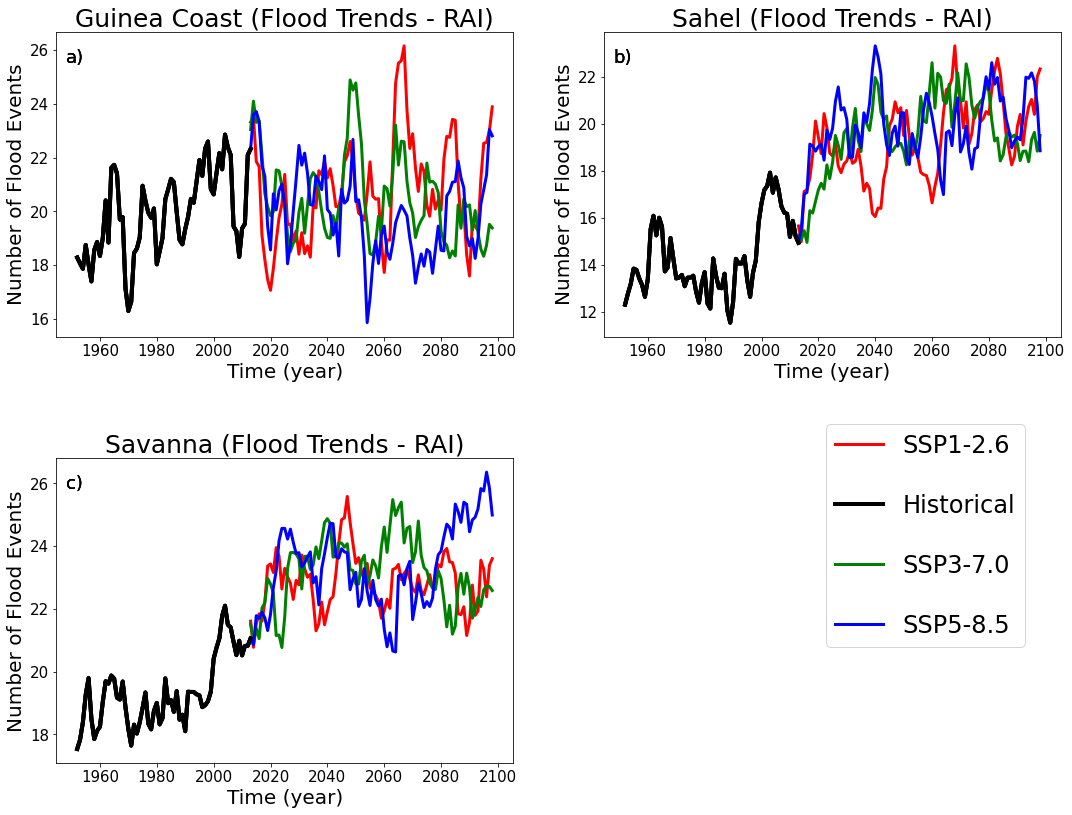

In [25]:
import pymannkendall as pk
parameters = {'axes.labelsize': 20, 'xtick.labelsize':15, 'ytick.labelsize':15,'axes.titlesize': 25,'legend.fontsize':24}
plt.rcParams.update(parameters)

labels = ['SSP1-2.6','SSP3-7.0','SSP5-8.5']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,14))
fig.subplots_adjust(wspace=0.2, hspace=0.4, top=0.85)
#ax = axes.flatten()

for j,scenario in enumerate(scenarios):
        a = GC_flood_RAI[scenario].sel(year=slice('2011','2100'))
        a1 = GC_flood_RAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        c = SAH_flood_RAI[scenario].sel(year=slice('2011','2100'))
        c1 = SAH_flood_RAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        e = SAV_flood_RAI[scenario].sel(year=slice('2011','2100'))
        e1 = SAV_flood_RAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario, linewidth=0.5, linestyle='dashed')
        ax[0,0].plot(a.year, a.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =labels[j])
        ax[0,0].plot(a1.year, a1.rolling(year=5, center=True).mean(), color='k', linewidth=4, label ='Historical' if j==0 else '')
        '''
        ax[0,0].text(0.05,0.85,r'$\Delta {m} = $'+str(dif(a.rolling(year=5, center=True).mean(), p2)), transform=ax[0,0].transAxes,
            fontsize=24, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[0,0].text(0.02,0.9, 'a)', transform=ax[0,0].transAxes, fontsize = 18)
        
        ax[0,0].set(title='Guinea Coast (Flood Trends - RAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')

        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[0,1].plot(c.year, c.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[0,1].plot(c1.year, c1.rolling(year=5, center=True).mean(), color='k', linewidth=4)#, label ='Historical')
        ax[0,1].set(title='Sahel (Flood Trends - RAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[0,1].text(0.05,0.85,r'$\Delta {m} = $'+str(dif(c, p2)),transform=ax[0,1].transAxes,
            fontsize=24, verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[0,1].text(0.02,0.9, 'b)', transform=ax[0,1].transAxes, fontsize = 18)

        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[1,0].plot(e.year, e.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[1,0].plot(e1.year, e1.rolling(year=5, center=True).mean(), color='k', linewidth=4)#, label ='Historical')
        ax[1,0].set(title='Savanna (Flood Trends - RAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[1,0].text(0.05,0.85,r'$\Delta {m} = $'+str(dif(e, p2)),transform=ax[1,0].transAxes,
            fontsize=24, verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[1,0].text(0.02,0.9, 'c)', transform=ax[1,0].transAxes, fontsize = 18)
                   
handles, labels = ax[0,0].get_legend_handles_labels()
#fig.suptitle('RAI Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.4), labelspacing=1.5)
fig.delaxes(ax[1,1])
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'rai_fl-trnds')
plt.show()

<h3> Visualization of Flood trends based on Standardized Anomaly Index (SAI) <h3>

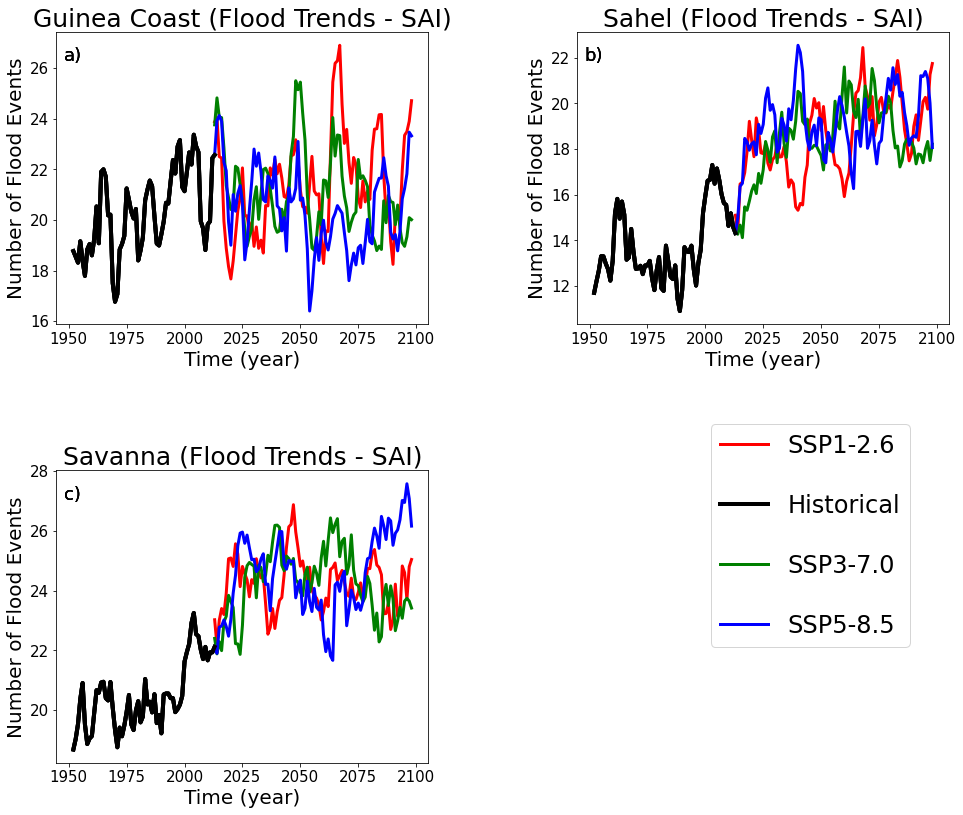

In [43]:
parameters = {'axes.labelsize': 20, 'xtick.labelsize':15, 'ytick.labelsize':15,
              'axes.titlesize': 25,'legend.fontsize':24}#, 'axes.textsize':20}
plt.rcParams.update(parameters)
labels = ['SSP1-2.6','SSP3-7.0','SSP5-8.5']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()
for j,scenario in enumerate(scenarios):
        b = GC_flood_SAI[scenario].sel(year=slice('2011','2100'))
        b1 = GC_flood_SAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        d = SAH_flood_SAI[scenario].sel(year=slice('2011','2100'))
        d1 = SAH_flood_SAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        f =  SAV_flood_SAI[scenario].sel(year=slice('2011','2100'))
        f1 =  SAV_flood_SAI['SSP5_8_5'].sel(year=slice('1950','2015'))
        
        #ax[0].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario,linewidth=0.5, linestyle='dashed')
        ax[0].plot(b.year, b.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label=labels[j])
        ax[0].plot(b1.year, b1.rolling(year=5, center=True).mean(), color='k', linewidth=4, label='Historical' if j==0 else '')
        ax[0].set(title='Guinea Coast (Flood Trends - SAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[0].text(0.05,0.85,r'$\Delta {m} = $'+str(dif(b, p2)),transform=ax[0].transAxes,
            fontsize=24, verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[0].text(0.02,0.9, 'a)', transform=ax[0].transAxes, fontsize = 18)
        
        #ax[1].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[1].plot(d.year, d.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[1].plot(d1.year, d1.rolling(year=5, center=True).mean(), color='k', linewidth=4)#, label =scenario)
        ax[1].set(title='Sahel (Flood Trends - SAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[1].text(0.05,0.85,r'$\Delta {m} = $'+str(dif(d, p2)),transform=ax[1].transAxes,
            fontsize=24, verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[1].text(0.02,0.9, 'b)', transform=ax[1].transAxes, fontsize = 18)

        #ax[2].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[2].plot(f.year, f.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[2].plot(f1.year, f1.rolling(year=5, center=True).mean(), color='k', linewidth=4)#, label ='Historical' if j==0 else '')
        ax[2].set(title='Savanna (Flood Trends - SAI)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[2].text(0.05,0.88,r'$\Delta {m} = $'+str(dif(f, p2)),transform=ax[2].transAxes,
            fontsize=24, verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[2].text(0.02,0.9, 'c)', transform=ax[2].transAxes, fontsize = 18)
        
handles, labels = ax[0].get_legend_handles_labels()
#fig.suptitle('SAI Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.4), labelspacing=1.5)
fig.delaxes(ax[3])
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'sai_fl-trnds')
plt.show()

<h3> Visualization of Flood trends based on Standardized Precipitation Index (SPI) <h3>

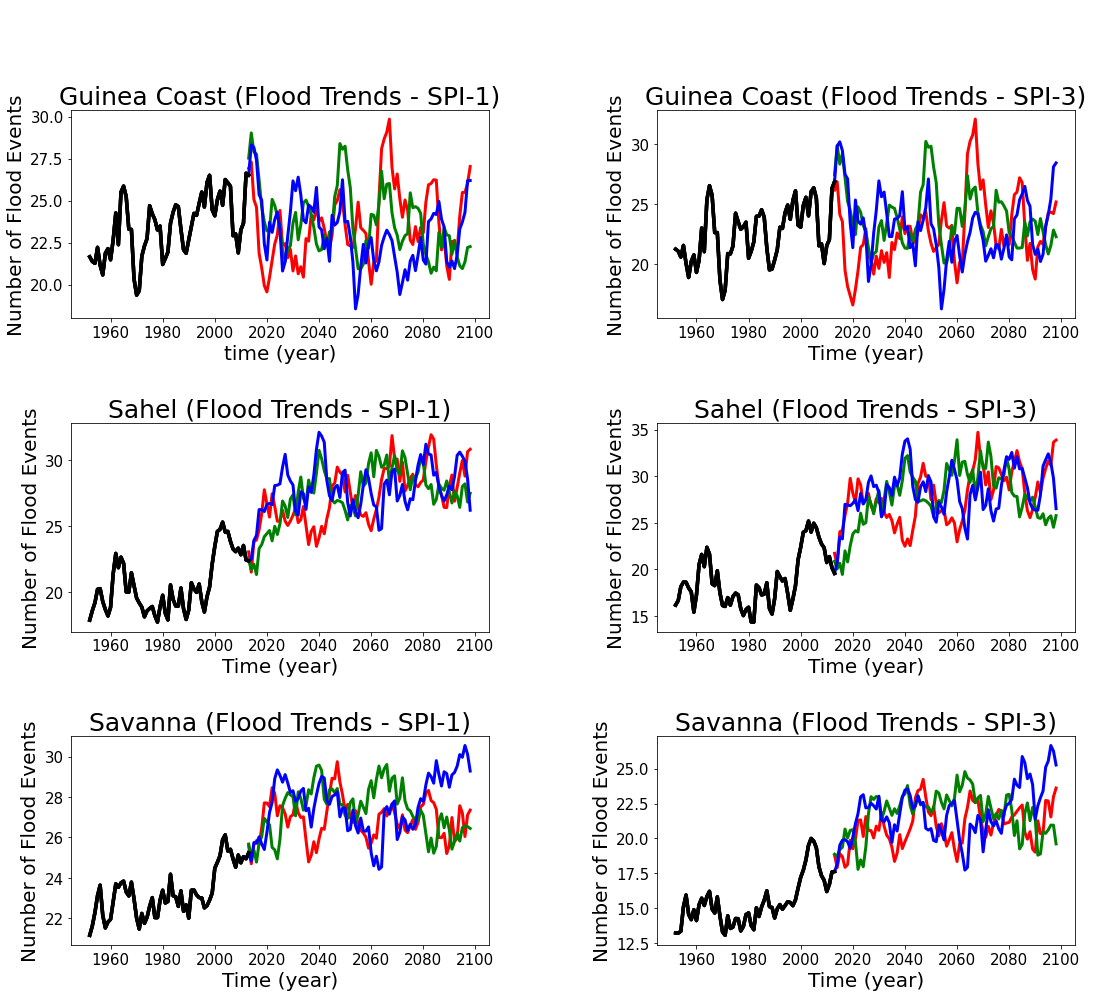

In [8]:
parameters = {'axes.labelsize': 20, 'xtick.labelsize':15, 'ytick.labelsize':15,
              'axes.titlesize': 25,'legend.fontsize':24}#, 'axes.textsize':20}
plt.rcParams.update(parameters)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()

for j,scenario in enumerate(scenarios):
        a = GC_flood_SPI1[scenario].sel(year=slice('2011','2100'))
        a1 = GC_flood_SPI1['SSP5_8_5'].sel(year=slice('1950','2015'))
        b = GC_flood_SPI3[scenario].sel(year=slice('2011','2100'))
        b1 = GC_flood_SPI3['SSP5_8_5'].sel(year=slice('1950','2015'))
        c = SAH_flood_SPI1[scenario].sel(year=slice('2011','2100'))
        c1 = SAH_flood_SPI1['SSP5_8_5'].sel(year=slice('1950','2015'))
        d = SAH_flood_SPI3[scenario].sel(year=slice('2011','2100'))
        d1 = SAH_flood_SPI3['SSP5_8_5'].sel(year=slice('1950','2015'))
        e = SAV_flood_SPI1[scenario].sel(year=slice('2011','2100'))
        e1 = SAV_flood_SPI1['SSP5_8_5'].sel(year=slice('1950','2015'))
        f =  SAV_flood_SPI3[scenario].sel(year=slice('2011','2100'))
        f1 =  SAV_flood_SPI3['SSP5_8_5'].sel(year=slice('1950','2015'))
        
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario, linewidth=0.5, linestyle='dashed')
        ax[0].plot(a.year, a.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[0].plot(a1.year, a1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5, label ='Historical' if j==0 else '')
        '''
        ax[0].text(0.05,0.85,f'm = {dif(a, p2)}', transform=ax[0].transAxes,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        ax[0].set(title='Guinea Coast (Flood Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario,linewidth=0.5, linestyle='dashed')
        ax[1].plot(b.year, b.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3)
        ax[1].plot(b1.year, b1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5)
        ax[1].set(title='Guinea Coast (Flood Trends - SPI-3)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[1].text(0.05,0.85,f'm = {dif(b, p2)}',transform=ax[1].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[2].plot(c.year, c.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[2].plot(c1.year, c1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5)#, label =scenario)
        ax[2].set(title='Sahel (Flood Trends - SPI-1)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[2].text(0.05,0.85,f'm = {dif(c, p2)}',transform=ax[2].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        #ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[3].plot(d.year, d.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[3].plot(d1.year, d1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5)#, label =scenario)
        ax[3].set(title='Sahel (Flood Trends - SPI-3)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[3].text(0.05,0.85,f'm = {dif(d, p2)}',transform=ax[3].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[4].plot(e.year, e.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[4].plot(e1.year, e1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5)#, label =scenario)
        ax[4].set(title='Savanna (Flood Trends - SPI-1)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[4].text(0.05,0.85,f'm = {dif(e, p2)}',transform=ax[4].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
        #ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[5].plot(f.year, f.rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[5].plot(f1.year, f1.rolling(year=5, center=True).mean(), color='k', linewidth=3.5)#, label =scenario)
        ax[5].set(title='Savanna (Flood Trends - SPI-3)', xlabel= 'Time (year)', ylabel = 'Number of Flood Events')
        '''
        ax[5].text(0.05,0.88,f'm = {dif(f, p2)}',transform=ax[5].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        '''
handles, labels = ax[0].get_legend_handles_labels()
#fig.suptitle('SPI-1 vrs SPI-3 Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=6, labelspacing=1.5)
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'spi-1 vrs spi-3_fl-trnds')
#plt.show()

In [51]:
#For RAI SAH:
f.sel(year=slice('2015','2040')).mean()-f.sel(year=slice('1950','2014')).mean()

<xarray.DataArray 'pr' ()>
array(2.61939103)

In [52]:
f.sel(year=slice('2015','2080')).mean()-f.sel(year=slice('1950','2014')).mean()

<xarray.DataArray 'pr' ()>
array(2.19539141)

In [53]:
f.sel(year=slice('2015','2100')).mean()-f.sel(year=slice('1950','2014')).mean()

<xarray.DataArray 'pr' ()>
array(2.67272287)

In [44]:
d.sel(year=slice('1950','2014')).mean()

<xarray.DataArray 'pr' ()>
array(23.73611111)

In [115]:
p1 = slice('2015','2040'); p2 = slice('2040','2080');  p3 = slice('2080','2100');
data = {'C1': [dif(b, p1), dif(d, p1) ,dif(f, p1)],
        'C2': [dif(b, p2), dif(d, p2), dif(f, p2)],
        'C3': [dif(b, p3), dif(d, p3), dif(f, p3)]}

df1 = pd.DataFrame(data, index=['GC','SAH','SAV'])

print (df1)

       C1     C2    C3
GC   0.83  -0.94  0.41
SAH  4.94   4.91   5.9
SAV  3.76   3.24  5.51


In [116]:
def add_top_column(df, top_col, inplace=False):
    if not inplace:
        df = df.copy()
    
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df


orig_df = pd.DataFrame([[1, 2], [3, 4]], columns=['a', 'b'])
new_df = add_top_column(df1, "RAI")
new_df

RAI             
       C1     C2    C3
GC   0.83  -0.94  0.41
SAH  4.94   4.91   5.9
SAV  3.76   3.24  5.51

In [ ]:
(ds.sel(year=p1).mean()-ds.sel(year=slice('1950','2020')).mean()).round(2)

In [65]:
dif(d, p2)#[0]#.astype('str')

array(5.2)

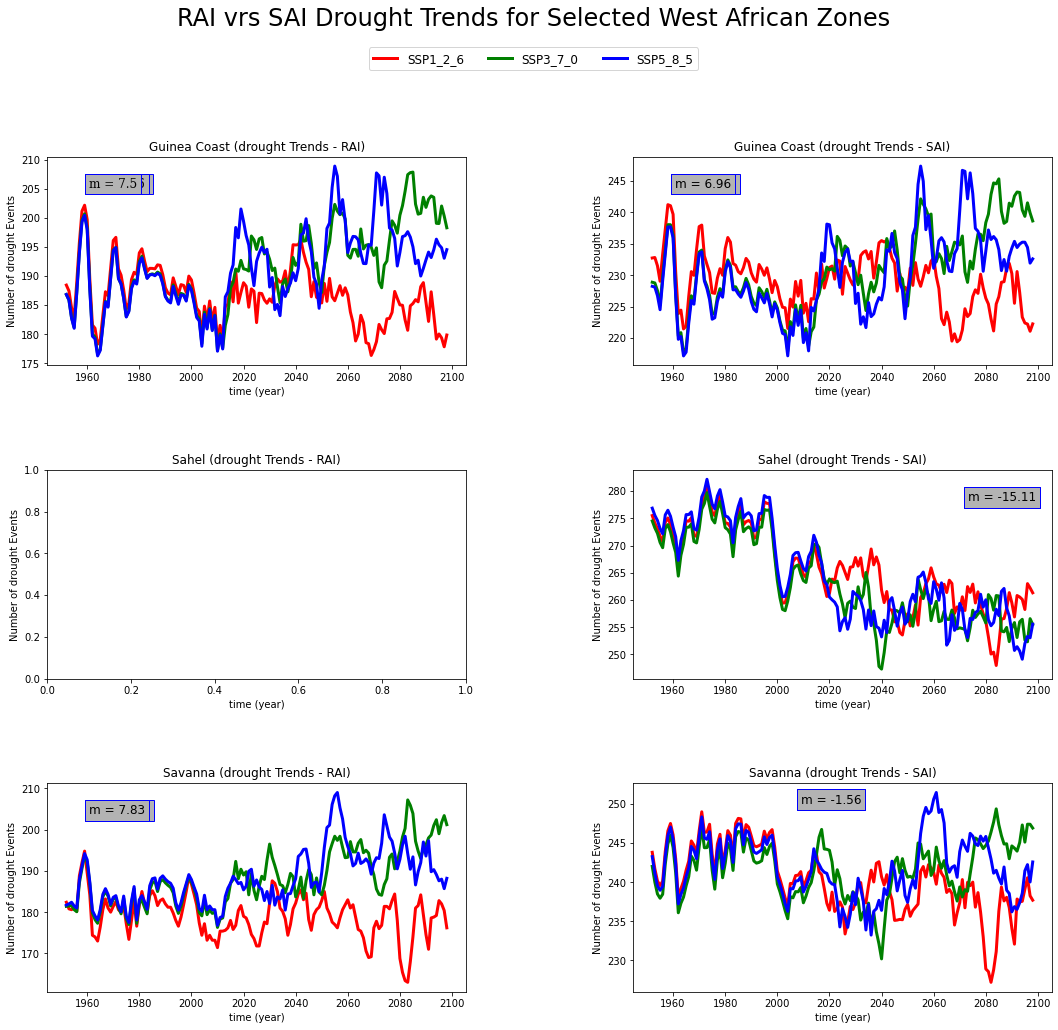

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()
    
for j,scenario in enumerate(scenarios):
        a = GC_drought_RAI[scenario].rolling(year=5, center=True).mean()
        b = GC_drought_SAI[scenario].rolling(year=5, center=True).mean()
        #c = SAH_drought_RAI[scenario].rolling(year=5, center=True).mean()
        d = SAH_drought_SAI[scenario].rolling(year=5, center=True).mean()
        e = SAV_drought_RAI[scenario].rolling(year=5, center=True).mean()
        f =  SAV_drought_SAI[scenario].rolling(year=5, center=True).mean()
        
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[0].plot(GC_drought_RAI[scenario].year, a, color=colors[j], linewidth=3, label =scenario)
        ax[0].set(title='Guinea Coast (drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[0].text(0.1,0.9,f'm = {dif(a, p2)}',transform=ax[0].transAxes,fontsize='large', verticalalignment='top', 
                   fontfamily='serif',bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[1].plot(GC_drought_SAI[scenario].year, b, color=colors[j], linewidth=3)
        ax[1].set(title='Guinea Coast (drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[1].text(0.1,0.9,f'm = {dif(b, p2)}',transform=ax[1].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        #ax[2].plot(SAH_drought_RAI[scenario].year, c, color=colors[j], linewidth=3, label =scenario)
        ax[2].set(title='Sahel (drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')

        #ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[3].plot(SAH_drought_SAI[scenario].year, d, color=colors[j], linewidth=3, label =scenario)
        ax[3].set(title='Sahel (drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[3].text(0.8,0.9,f'm = {dif(d, p2)}', transform=ax[3].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[4].plot(SAV_drought_RAI[scenario].year, e, color=colors[j], linewidth=3, label =scenario)
        ax[4].set(title='Savanna (drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[4].text(0.1,0.9,f'm = {dif(e, p2)}',transform=ax[4].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[5].plot(SAV_drought_SAI[scenario].year, f, color=colors[j], linewidth=3, label =scenario)
        ax[5].set(title='Savanna (drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[5].text(0.4,0.95,f'm = {dif(f, p2)}' ,transform=ax[5].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
handles, labels = ax[0].get_legend_handles_labels()
fig.suptitle('RAI vrs SAI Drought Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'rai vrs sai_dght-trnds')
plt.show()

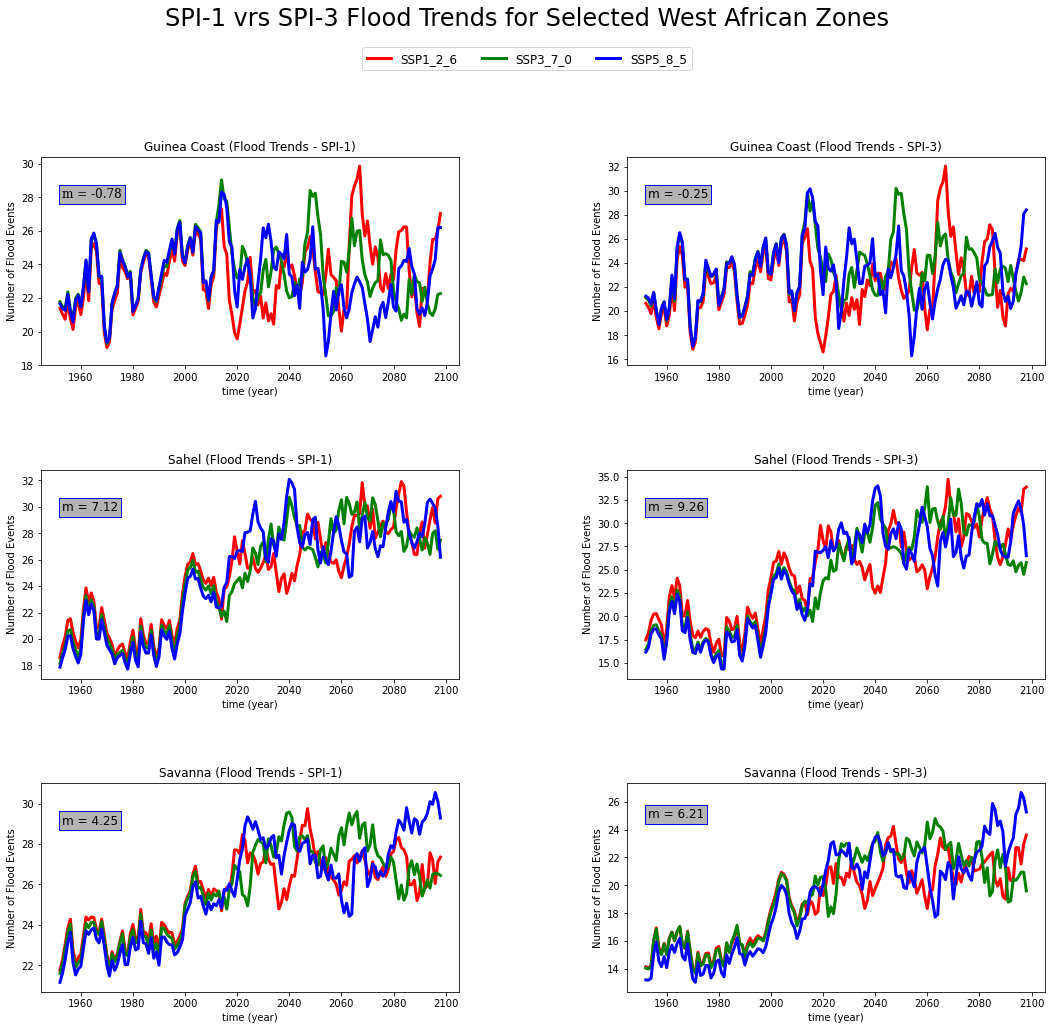

In [ ]:
p1 = slice('2021','2060')
p2 = slice('2021','2100')
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,14))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()

for j,scenario in enumerate(scenarios):
        a = GC_flood_SPI1[scenario].rolling(year=5, center=True).mean()
        b = GC_flood_SPI3[scenario].rolling(year=5, center=True).mean()
        c = SAH_flood_SPI1[scenario].rolling(year=5, center=True).mean()
        d = SAH_flood_SPI3[scenario].rolling(year=5, center=True).mean()
        e = SAV_flood_SPI1[scenario].rolling(year=5, center=True).mean()
        f =  SAV_flood_SPI3[scenario].rolling(year=5, center=True).mean()
        
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario, linewidth=0.5, linestyle='dashed')
        ax[0].plot(GC_flood_SPI1[scenario].year, a, color=colors[j], linewidth=3, label =scenario)
        ax[0].text(0.05,0.85,f'm = {dif(a, p2)}', transform=ax[0].transAxes,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
        ax[0].set(title='Guinea Coast (Flood Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario,linewidth=0.5, linestyle='dashed')
        ax[1].plot(GC_flood_SPI3[scenario].year, b, color=colors[j], linewidth=3)
        ax[1].set(title='Guinea Coast (Flood Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')
        ax[1].text(0.05,0.85,f'm = {dif(b, p2)}',transform=ax[1].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[2].plot(SAH_flood_SPI1[scenario].year, c, color=colors[j], linewidth=3, label =scenario)
        ax[2].set(title='Sahel (Flood Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')
        ax[2].text(0.05,0.85,f'm = {dif(c, p2)}',transform=ax[2].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
        #ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[3].plot(SAH_flood_SPI3[scenario].year, d, color=colors[j], linewidth=3, label =scenario)
        ax[3].set(title='Sahel (Flood Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')
        ax[3].text(0.05,0.85,f'm = {dif(d, p2)}',transform=ax[3].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[4].plot(SAV_flood_SPI1[scenario].year, e, color=colors[j], linewidth=3, label =scenario)
        ax[4].set(title='Savanna (Flood Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')
        ax[4].text(0.05,0.85,f'm = {dif(e, p2)}',transform=ax[4].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
        #ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[5].plot(SAV_flood_SPI3[scenario].year, f, color=colors[j], linewidth=3, label =scenario)
        ax[5].set(title='Savanna (Flood Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')
        ax[5].text(0.05,0.88,f'm = {dif(f, p2)}',transform=ax[5].transAxes,
            fontsize='large', verticalalignment='top', #fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='b', pad=3.0))
        
handles, labels = ax[0].get_legend_handles_labels()
fig.suptitle('SPI-1 vrs SPI-3 Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'spi-1 vrs spi-3_fl-trnds')
plt.show()

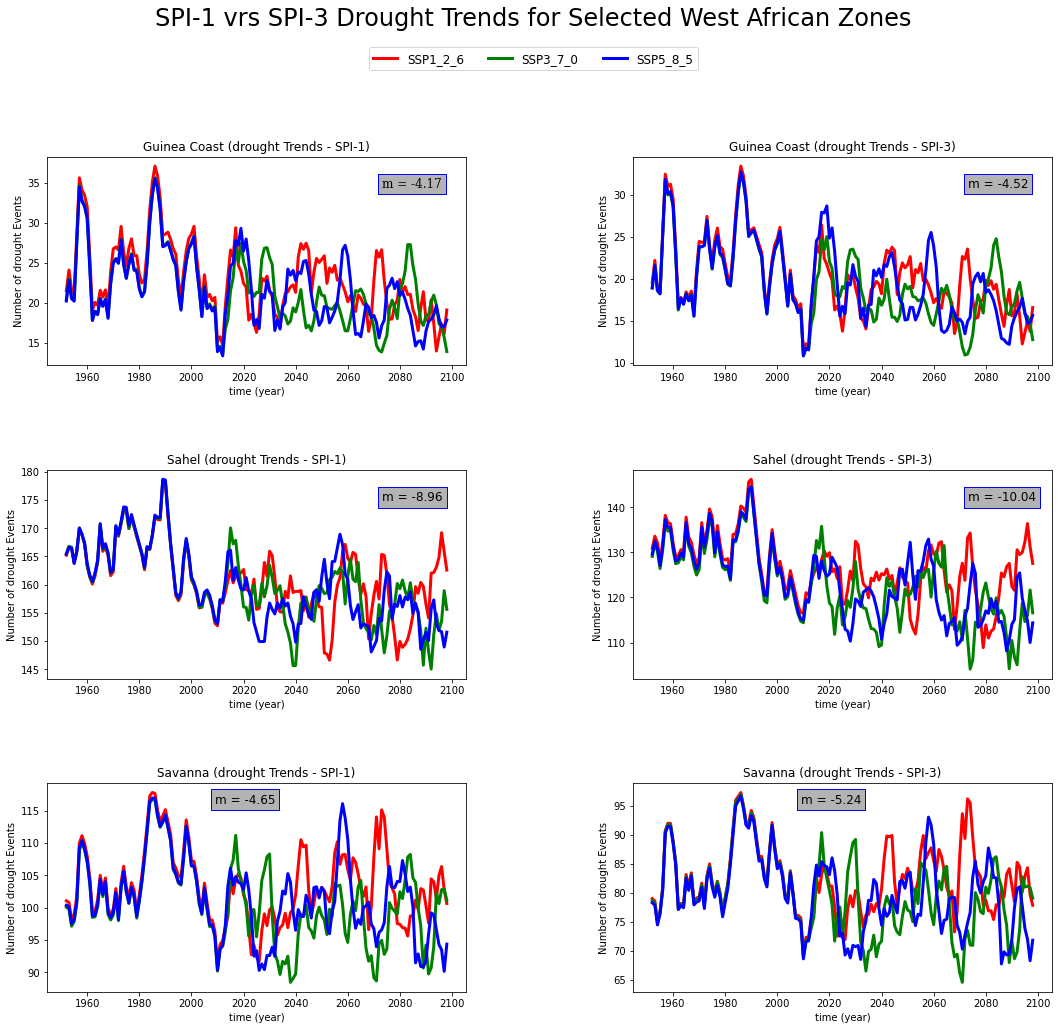

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()
    
for j,scenario in enumerate(scenarios):
        a = GC_drought_SPI1[scenario].rolling(year=5, center=True).mean()
        b = GC_drought_SPI3[scenario].rolling(year=5, center=True).mean()
        c = SAH_drought_SPI1[scenario].rolling(year=5, center=True).mean()
        d = SAH_drought_SPI3[scenario].rolling(year=5, center=True).mean()
        e = SAV_drought_SPI1[scenario].rolling(year=5, center=True).mean()
        f =  SAV_drought_SPI3[scenario].rolling(year=5, center=True).mean()
        
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[0].plot(GC_drought_SPI1[scenario].year, a, color=colors[j], linewidth=3, label =scenario)
        ax[0].set(title='Guinea Coast (drought Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[0].text(0.8,0.9,f'm = {dif(a, p2)}',transform=ax[0].transAxes,fontsize='large', verticalalignment='top', 
                   fontfamily='serif',bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[1].plot(GC_drought_SPI3[scenario].year, b, color=colors[j], linewidth=3)
        ax[1].set(title='Guinea Coast (drought Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[1].text(0.8,0.9,f'm = {dif(b, p2)}',transform=ax[1].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[2].plot(SAH_drought_SPI1[scenario].year, c, color=colors[j], linewidth=3, label =scenario)
        ax[2].set(title='Sahel (drought Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[2].text(0.8,0.9,f'm = {dif(c, p2)}', transform=ax[2].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[3].plot(SAH_drought_SPI3[scenario].year, d, color=colors[j], linewidth=3, label =scenario)
        ax[3].set(title='Sahel (drought Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[3].text(0.8,0.9,f'm = {dif(d, p2)}', transform=ax[3].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[4].plot(SAV_drought_SPI1[scenario].year, e, color=colors[j], linewidth=3, label =scenario)
        ax[4].set(title='Savanna (drought Trends - SPI-1)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[4].text(0.4,0.95,f'm = {dif(e, p2)}',transform=ax[4].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
        #ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[5].plot(SAV_drought_SPI3[scenario].year, f, color=colors[j], linewidth=3, label =scenario)
        ax[5].set(title='Savanna (drought Trends - SPI-3)', xlabel= 'time (year)', ylabel = 'Number of drought Events')
        ax[5].text(0.4,0.95,f'm = {dif(f, p2)}' ,transform=ax[5].transAxes,fontsize='large', verticalalignment='top', 
                   bbox=dict(facecolor='0.7', edgecolor='b', pad=4.0))
        
handles, labels = ax[0].get_legend_handles_labels()
fig.suptitle('SPI-1 vrs SPI-3 Drought Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'spi-1 vrs spi-3_dght-trnds')
plt.show()

In [113]:
SAH_RAI[scenario].median('time')#.plot()

<xarray.DataArray 'pr' (lat: 2, lon: 6)>
array([[0.8697955 , 0.84278065, 0.76758504, 0.8086253 , 0.75387794,
        0.7374946 ],
       [0.95861936, 0.91318834, 0.8850906 , 0.8757926 , 0.84972656,
        0.85758424]], dtype=float32)
Coordinates:
  * lat      (lat) float64 13.12 14.38
  * lon      (lon) float64 -4.688 -2.812 -0.9375 0.9375 2.812 4.688

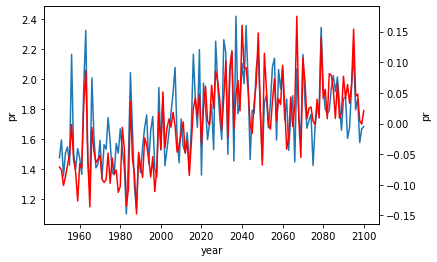

In [107]:
a=SAH_RAI[scenario].groupby('time.year').mean('time').mean(['lon','lat'])

ax = plt.subplot(111)
a = SAH_RAI[scenario].groupby('time.year').mean('time').mean(['lon','lat'])
a.plot()

ax1 = ax.twinx()
a = SAH_SAI[scenario].groupby('time.year').mean('time').mean(['lon','lat'])
a.plot(color='r', ax=ax1)

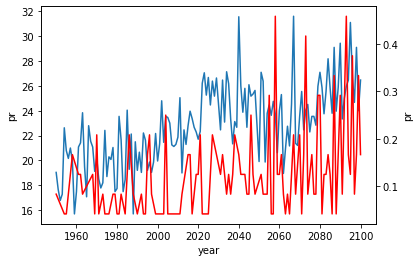

In [182]:
ax = plt.subplot(111)
a = sai(s[scenario], 'time')
a.where(a>1.5, drop=True).groupby('time.year').count('time').mean(['lat','lon']).plot()

ax1 = ax.twinx()
a = rai(s[scenario], 'time')
a.where(a>2, drop=True).groupby('time.year').count('time').mean(['lat','lon']).plot(color='r', ax=ax1)

In [149]:
pk.original_test(a).p

0.7913005028986309

In [137]:
ssp_file = OrderedDict();
s = OrderedDict(); s1 = OrderedDict();
GC_RAI = OrderedDict(); GC_flood_RAI = OrderedDict();
GC_RAI1 = OrderedDict(); GC_flood_RAI1 = OrderedDict();
SAV_RAI = OrderedDict(); SAV_flood_RAI = OrderedDict();
SAV_RAI1 = OrderedDict(); SAV_flood_RAI1 = OrderedDict();
SAH_RAI = OrderedDict(); SAH_flood_RAI = OrderedDict();
SAH_RAI1 = OrderedDict(); SAH_flood_RAI1 = OrderedDict();

GC_SAI = OrderedDict(); GC_flood_SAI = OrderedDict();
GC_SAI1 = OrderedDict(); GC_flood_SAI1 = OrderedDict();
SAV_SAI = OrderedDict(); SAV_flood_SAI = OrderedDict();
SAV_SAI1 = OrderedDict(); SAV_flood_SAI1 = OrderedDict();
SAH_SAI = OrderedDict(); SAH_flood_SAI = OrderedDict();
SAH_SAI1 = OrderedDict(); SAH_flood_SAI1 = OrderedDict();

for z, zone in enumerate(zones):
    for j,scenario in enumerate(scenarios):
        ssp_path = scenarios.get(scenario)
        for k, mod_scenario in enumerate(mod_scenarios.get(scenario)):
            ssp_file[scenario] = xr.open_dataset(glob(os.path.join(ssp_path, mod_scenario+'.nc'))[0])
            if zone == 'Guinea Coast':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(4,8), time = slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2015'))
                ### RAI ###
                GC_RAI[scenario] = rai(s[scenario], 'time', 'ordinary')
                GC_RAI1[scenario] = rai(s1[scenario], 'time', 'ordinary')
                GC_flood_RAI[scenario] = GC_RAI[scenario].where(GC_RAI[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                GC_flood_RAI1[scenario] = GC_RAI1[scenario].where(GC_RAI1[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                
                ### SAI ###
                GC_SAI[scenario] = sai(s[scenario], 'time')
                GC_SAI1[scenario] = sai(s1[scenario], 'time')
                GC_flood_SAI[scenario] = GC_SAI[scenario].where(GC_SAI[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                GC_flood_SAI1[scenario] = GC_SAI1[scenario].where(GC_SAI1[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                
            if zone == 'Savanna':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(8,12), time = slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('1950','2015'))
                ### RAI ###
                SAV_RAI[scenario] = rai(s[scenario], 'time', 'ordinary')
                SAV_RAI1[scenario] = rai(s1[scenario], 'time', 'ordinary')
                SAV_flood_RAI[scenario] = SAV_RAI[scenario].where(SAV_RAI[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                SAV_flood_RAI1[scenario] = SAV_RAI1[scenario].where(SAV_RAI1[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                
                ### SAI ###
                SAV_SAI[scenario] = sai(s[scenario], 'time')
                SAV_SAI1[scenario] = sai(s1[scenario], 'time')
                SAV_flood_SAI[scenario] = SAV_SAI[scenario].where(SAV_SAI[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                SAV_flood_SAI1[scenario] = SAV_SAI1[scenario].where(SAV_SAI1[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                
            else:
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(12,20), time = slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2015'))
                ### RAI ###
                SAH_RAI[scenario] = rai(s[scenario], 'time', 'ordinary')
                SAH_RAI1[scenario] = rai(s1[scenario], 'time', 'ordinary')
                SAH_flood_RAI[scenario] = SAH_RAI[scenario].where(SAH_RAI[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                SAH_flood_RAI1[scenario] = SAH_RAI1[scenario].where(SAH_RAI1[scenario]>2, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                
                ### SAI ###
                SAH_SAI[scenario] = sai(s[scenario], 'time')
                SAH_SAI1[scenario] = sai(s1[scenario], 'time')
                SAH_flood_SAI[scenario] = SAH_SAI[scenario].where(SAH_SAI[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])
                SAH_flood_SAI1[scenario] = SAH_SAI1[scenario].where(SAH_SAI1[scenario]>1.99, drop=True).groupby('time.year').count('time').sum(['lon','lat'])

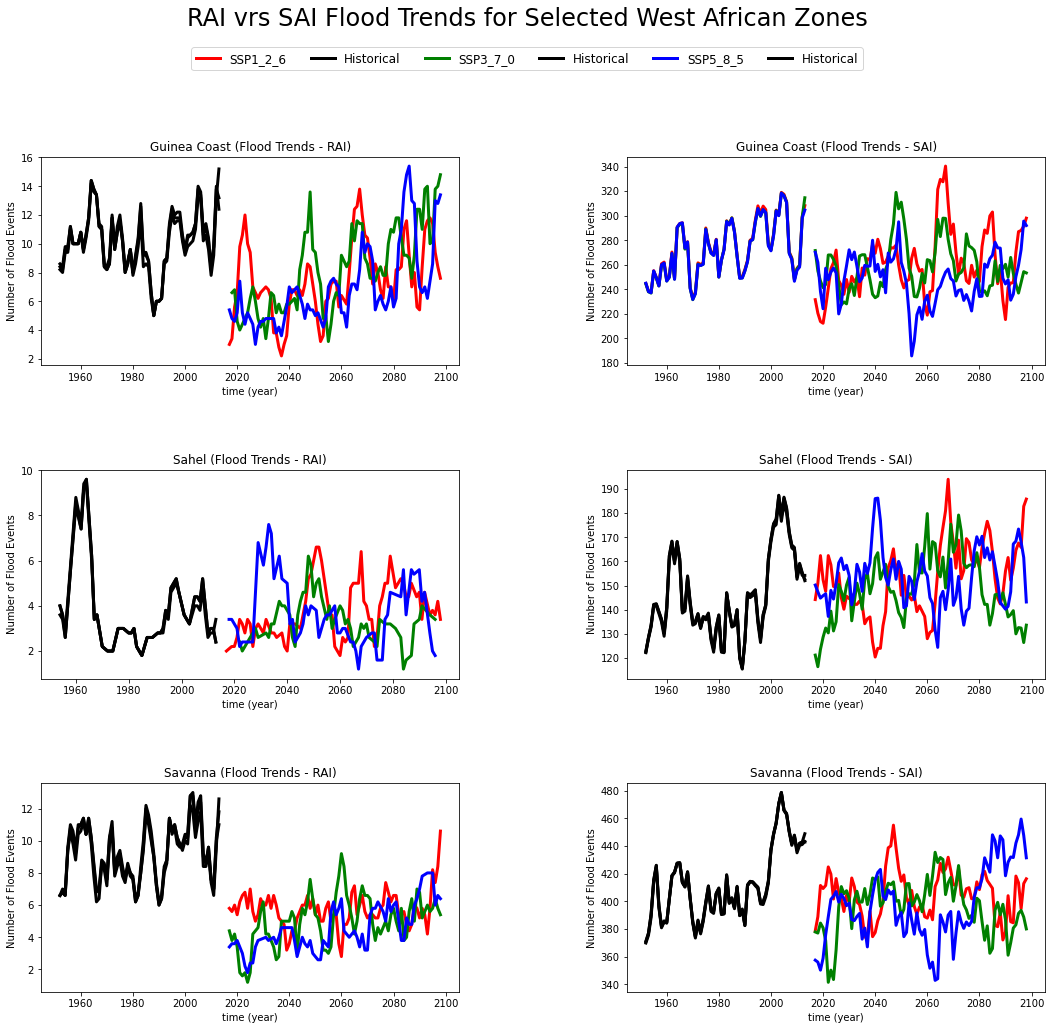

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()

for j,scenario in enumerate(scenarios):
        #ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[0].plot(GC_flood_RAI[scenario].year, GC_flood_RAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[0].plot(GC_flood_RAI1[scenario].year, GC_flood_RAI1[scenario].rolling(year=5, center=True).mean(), color='k', linewidth=3, label ='Historical')
        ax[0].set(title='Guinea Coast (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[1].plot(GC_flood_SAI[scenario].year, GC_flood_SAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3)
        ax[1].plot(GC_flood_SAI1[scenario].year, GC_flood_SAI1[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3)
        ax[1].set(title='Guinea Coast (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[2].plot(SAH_flood_RAI[scenario].year, SAH_flood_RAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[2].plot(SAH_flood_RAI1[scenario].year, SAH_flood_RAI1[scenario].rolling(year=5, center=True).mean(), color='k', linewidth=3, label =scenario)
        ax[2].set(title='Sahel (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[3].plot(SAH_flood_SAI[scenario].year, SAH_flood_SAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[3].plot(SAH_flood_SAI1[scenario].year, SAH_flood_SAI1[scenario].rolling(year=5, center=True).mean(), color='k', linewidth=3, label =scenario)
        ax[3].set(title='Sahel (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario], color=colors[j], label =scenario)
        ax[4].plot(SAV_flood_RAI[scenario].year, SAV_flood_RAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[4].plot(SAV_flood_RAI1[scenario].year, SAV_flood_RAI1[scenario].rolling(year=5, center=True).mean(), color='k', linewidth=3, label =scenario)
        ax[4].set(title='Savanna (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

        #ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario], color=colors[j], label =scenario)
        ax[5].plot(SAV_flood_SAI[scenario].year, SAV_flood_SAI[scenario].rolling(year=5, center=True).mean(), color=colors[j], linewidth=3, label =scenario)
        ax[5].plot(SAV_flood_SAI1[scenario].year, SAV_flood_SAI1[scenario].rolling(year=5, center=True).mean(), color='k', linewidth=3, label =scenario)
        ax[5].set(title='Savanna (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Number of Flood Events')

handles, labels = ax[0].get_legend_handles_labels()
fig.suptitle('RAI vrs SAI Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'rai vrs sai_fl-trends')
plt.show()

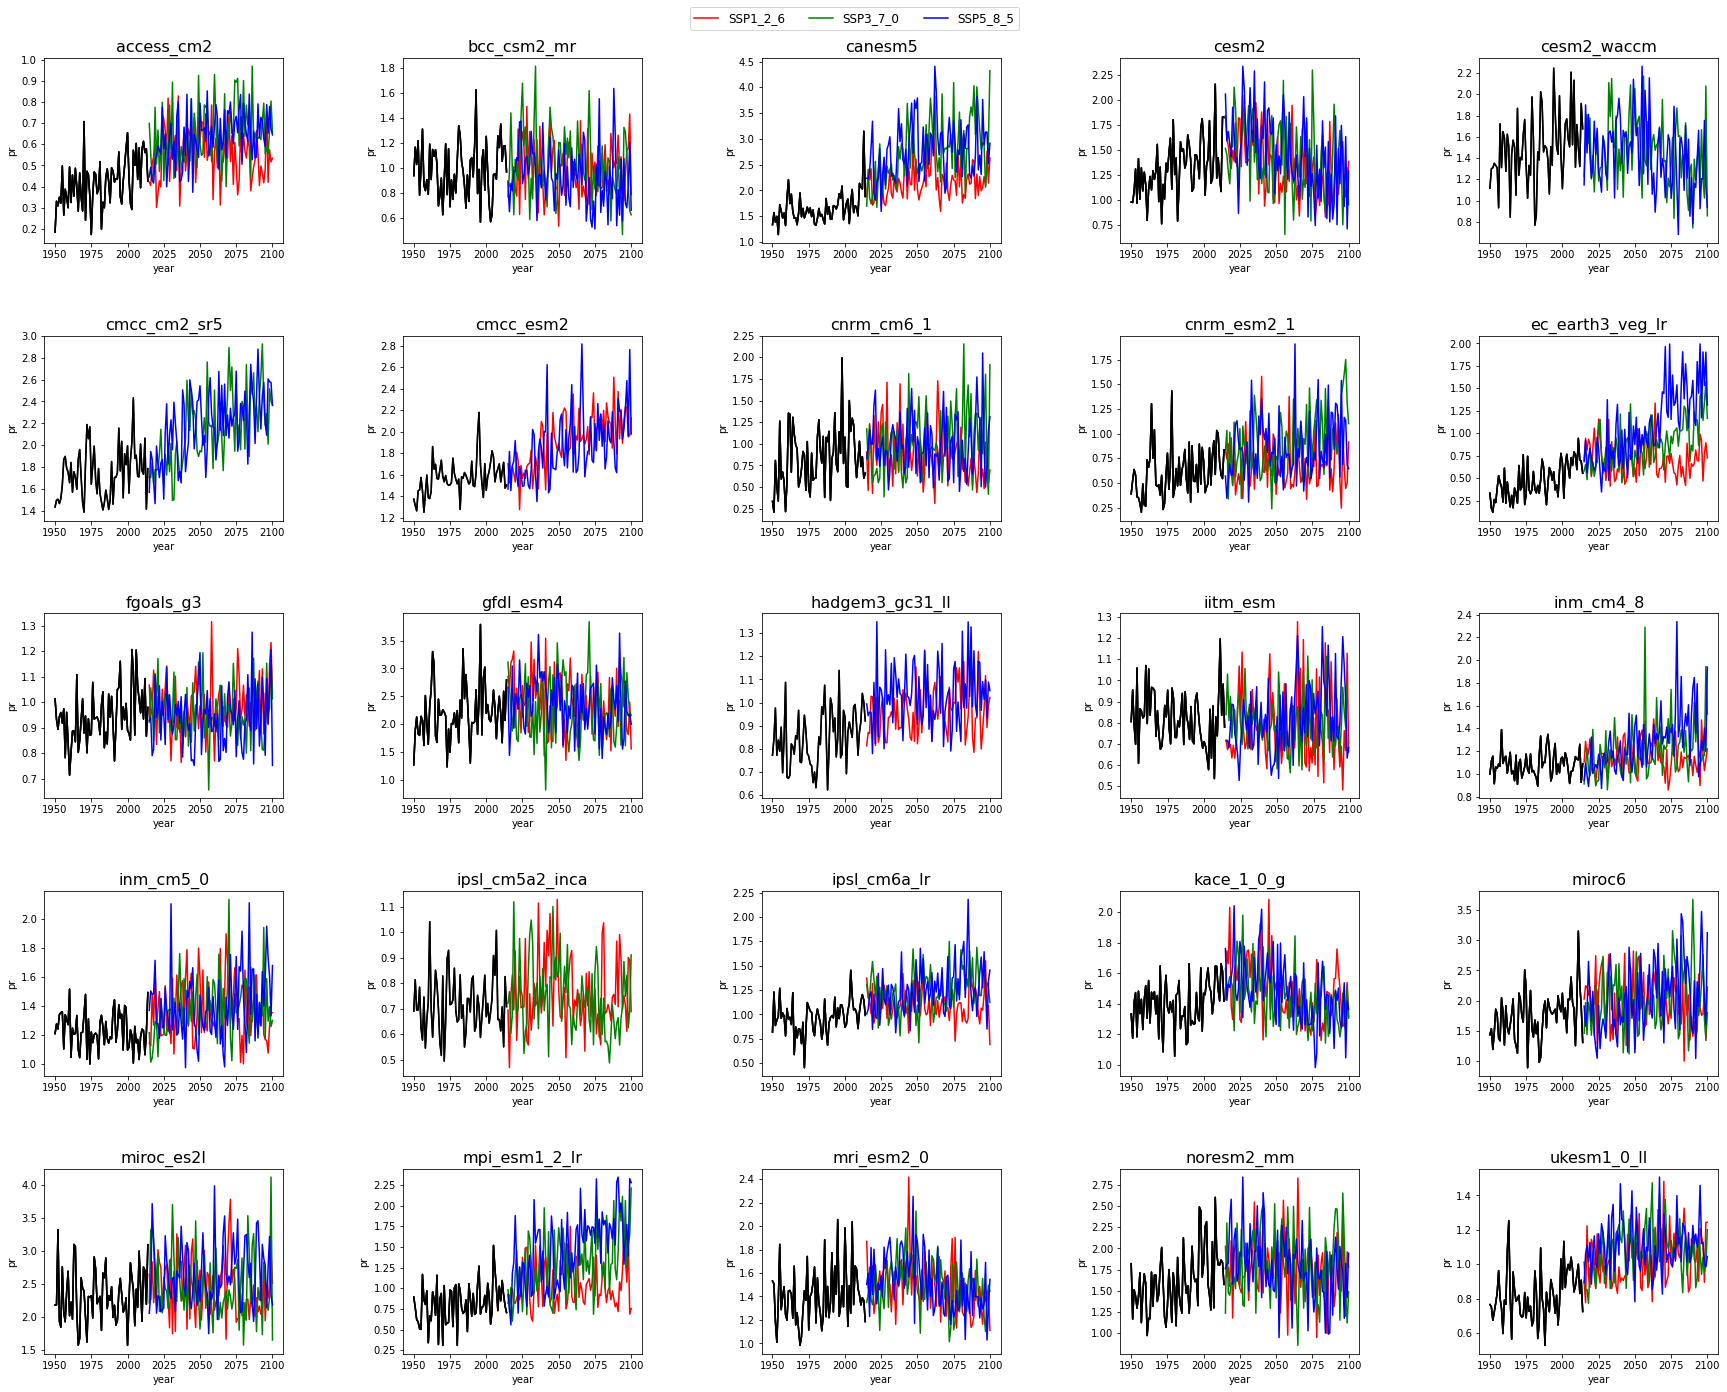

In [19]:
col = 5
row = [len(new_models)//col if len(new_models)%col==0 else len(new_models)//col+1][0]

fig, axes = plt.subplots(ncols=col, nrows=row, figsize=(6*col,4.5*row))
plt.subplots_adjust(hspace=0.5, wspace=0.5, top=0.925)

for i,mod in enumerate(new_models):
    #print(i, mod)
    
    for j,scenario in enumerate(scenarios):
        ssp_path = scenarios.get(scenario)
        #print(j,scenario)
        ax2use = axes[i//col, i%col]
        try:
            sp_file = glob(os.path.join(ssp_path, mod+'_'+scenario.lower()+'.nc'))
            sp_data = xr.open_dataset(sp_file[0])
            sp_data1 = sp_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time= slice('2015', '2100'))* 86400
            sp_data0 = sp_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time= slice('1950', '2014'))* 86400
            sp_data1 = sp_data1.mean(['lon', 'lat']).groupby('time.year').mean('time')
            sp_data0 = sp_data0.mean(['lon', 'lat']).groupby('time.year').mean('time')
            sp_data1.plot(ax=ax2use, color = colors[j], label=scenario)
            sp_data0.plot(ax=ax2use, color = 'k')
            ax2use.set_title(mod, fontsize='16')
            #axes[5,2].set_label(scenario)
        except IndexError:
            
            pass
        '''
        if [x for x in sp_file if x !=[]]:
            #print(sp_file)
        '''
        
        
#fig.delaxes(axes[5,4])
#fig.delaxes(axes[0,1])
handles, labels = axes[4,3].get_legend_handles_labels()

fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize='large', ncol=5, labelspacing=1.5)
#fig.suptitle('CMIP6 HISTORICAL PRECIPITATION VRS VARIOUS SCENARIO PROJECTIONS OVER WEST AFRICA (merged)', fontsize=26)
#save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'cmip6-hist_pre vrs sce_proj')
#plt.savefig('/home/receiver/Desktop/Data/CMIP6/'+'cmip6-hist_pre vrs sce_proj.pdf')
plt.show()

Difference between Historical rainfall and Projections
--

In [68]:
sp_data1 = OrderedDict()
sp_data0 = OrderedDict()
sp_file = OrderedDict()
sp_data = OrderedDict()

for i,mod in enumerate(new_models):
    #print(i, mod)
    
    for j,scenario in enumerate(scenarios):
        ssp_path = scenarios.get(scenario)
        #print(scenario,mod)
        try:
            sp_data[scenario,mod] = xr.open_dataset(glob(os.path.join(ssp_path, mod+'_'+scenario.lower()+'.nc'))[0])
            sp_data1[scenario,mod] = sp_data[scenario,mod].pr.sel(lon=slice(-17,17), lat=slice(12,20), time= slice('2015', '2100'))* 86400
            sp_data0[scenario,mod] = sp_data[scenario,mod].pr.sel(lon=slice(-17,17), lat=slice(12,20), time= slice('1950', '2014'))* 86400
            sp_data1[scenario,mod] = sp_data1[scenario,mod].mean(['lon', 'lat']).groupby('time.year').mean('time')
            sp_data0[scenario,mod] = sp_data0[scenario,mod].mean(['lon', 'lat']).groupby('time.year').mean('time')
        except IndexError:
            
            pass
        

In [218]:
rn_diff = OrderedDict()
#mode_val = []
data = {}
for j,scenario in enumerate(scenarios):
    for i,mod in enumerate(new_models):
        try:
            rn_diff[scenario,mod] = (sp_data1[scenario,mod].mean()-sp_data0[scenario,mod].mean()).round(2)
            data[scenario,mod]= rn_diff[scenario,mod].values.tolist() 
            #mode_val.append(rn_diff[scenario,mod].values)
            #pd.DataFrame(data=rn_diff[scenario,] ,columns=scenario,index = mod)
        except KeyError:
            pass
        

In [199]:
scen = {'SSP1_2_6','SSP3_7_0','SSP5_8_5'}
scen = sorted(scen)

mode= ['access_cm2','bcc_csm2_mr','canesm5','cesm2','cesm2_waccm','cmcc_cm2_sr5','cmcc_esm2',
       'cnrm_cm6_1','cnrm_esm2_1','ec_earth3_veg_lr','fgoals_g3','gfdl_esm4','hadgem3_gc31_ll',
       'iitm_esm','inm_cm4_8','inm_cm5_0','ipsl_cm5a2_inca','ipsl_cm6a_lr','kace_1_0_g','miroc6',
       'miroc_es2l','mpi_esm1_2_lr','mri_esm2_0','noresm2_mm','ukesm1_0_ll']
mode = sorted(mode)

In [216]:
tb = pd.DataFrame(columns=scen,index = [mode]) #columns=[scen])

In [217]:
SSP1_2_6 = [0.14,0.01,0.53,0.02,np.nan,np.nan,0.33,0.06,0.09,0.24,0.04,0.19,0.12,-0.04,0.06,0.14,0.04,
            0.15,0.08,0.23,0.14,0.23,0.08,0.14,0.21]
    
SSP5_8_5 = [0.21,-0.05,1.13,0.15,-0.05,0.44,0.3,0.16,0.25,0.62,-0.002,0.17,0.18,0.0,0.19,0.17,np.nan,
           0.29,0.08,0.32,0.32,0.67,0.11,0.19,0.29]

SSP3_7_0 = [0.23,0.04,1.09,0.09,-0.02,0.39,np.nan,0.19,0.31,0.43,0.02,0.07,np.nan,-0.02,0.12,
           0.15,0.03,0.27,0.05,0.3,0.16,0.5,0.1,0.2,0.26]

tb['SSP1_2_6']=SSP1_2_6
tb['SSP5_8_5']=SSP5_8_5
tb['SSP3_7_0']=SSP3_7_0
tb

,SSP1_2_6,SSP3_7_0,SSP5_8_5
access_cm2,0.14,0.23,0.210
bcc_csm2_mr,0.01,0.04,-0.050
canesm5,0.53,1.09,1.130
cesm2,0.02,0.09,0.150
cesm2_waccm,NaN,-0.02,-0.050
cmcc_cm2_sr5,NaN,0.39,0.440
cmcc_esm2,0.33,NaN,0.300
cnrm_cm6_1,0.06,0.19,0.160
cnrm_esm2_1,0.09,0.31,0.250
ec_earth3_veg_lr,0.24,0.43,0.620


### RAI and SAI calculations/classifications of climate extremes (Flood and Drought Episodes) ###

In [4]:
ssp_file = OrderedDict()
s = OrderedDict(); s1 = OrderedDict()
da_RR = OrderedDict(); da_RR1 = OrderedDict()
c1 =OrderedDict(); c11 =OrderedDict()
c2 = OrderedDict(); c21 = OrderedDict()
eval_dght_c1 = OrderedDict(); eval_dght_c11 = OrderedDict()
eval_dght_c2 = OrderedDict(); eval_dght_c21 = OrderedDict()
eval_fld_c1 = OrderedDict(); eval_fld_c11 = OrderedDict()
eval_fld_c2 = OrderedDict(); eval_fld_c21 = OrderedDict()

GC_fld_RAI = OrderedDict(); SAH_fld_RAI = OrderedDict(); SAV_fld_RAI = OrderedDict() 
GC_fld_SAI = OrderedDict(); SAH_fld_SAI = OrderedDict(); SAV_fld_SAI = OrderedDict()

GC_dght_RAI = OrderedDict(); SAH_dght_RAI = OrderedDict(); SAV_dght_RAI = OrderedDict()
GC_dght_SAI = OrderedDict(); SAH_dght_SAI = OrderedDict(); SAV_dght_SAI = OrderedDict()

GC_fld_RAI1 = OrderedDict(); SAH_fld_RAI1 = OrderedDict(); SAV_fld_RAI1 = OrderedDict() 
GC_fld_SAI1 = OrderedDict(); SAH_fld_SAI1 = OrderedDict(); SAV_fld_SAI1 = OrderedDict()

GC_dght_RAI1 = OrderedDict(); SAH_dght_RAI1 = OrderedDict(); SAV_dght_RAI1 = OrderedDict()
GC_dght_SAI1 = OrderedDict(); SAH_dght_SAI1 = OrderedDict(); SAV_dght_SAI1 = OrderedDict()

for z, zone in enumerate(zones):
    for j,scenario in enumerate(scenarios):
        ssp_path = scenarios.get(scenario)
        for k, mod_scenario in enumerate(mod_scenarios.get(scenario)):
            ssp_file[scenario] = xr.open_dataset(glob(os.path.join(ssp_path, mod_scenario+'.nc'))[0])
            if zone == 'Guinea Coast':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(4,8), time = slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2015'))#.mean(['lon','lat'])
                da_RR[scenario] = (s[scenario]* 86400).resample(time='Y').sum('time')
                da_RR1[scenario] = (s1[scenario]* 86400).resample(time='Y').sum('time')
                c1[scenario] = rai(da_RR[scenario], 'time','ordinary'); c2[scenario] = sai(da_RR[scenario], 'time')
                c11[scenario] = rai(da_RR1[scenario], 'time','ordinary'); c21[scenario] = sai(da_RR1[scenario], 'time')
                
                ######## Drought Assessment
                eval_dght_c1[scenario] = evaluate_dght_rai(c1[scenario]); eval_dght_c2[scenario] = evaluate_dght_sai(c2[scenario])
                eval_dght_c11[scenario] = evaluate_dght_rai(c11[scenario]); eval_dght_c21[scenario] = evaluate_dght_sai(c21[scenario])
                
                GC_dght_RAI[scenario] = eval_dght_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1[scenario]['time'].size+1)*100
                GC_dght_RAI1[scenario] = eval_dght_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c11[scenario]['time'].size+1)*100
                
                GC_dght_SAI[scenario] = eval_dght_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2[scenario]['time'].size+1)*100
                GC_dght_SAI1[scenario] = eval_dght_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c21[scenario]['time'].size+1)*100

                ##### Flood Assessment
                eval_fld_c1[scenario] = evaluate_fld_rai(c1[scenario]); eval_fld_c2[scenario] = evaluate_fld_sai(c2[scenario])
                eval_fld_c11[scenario] = evaluate_fld_rai(c11[scenario]); eval_fld_c21[scenario] = evaluate_fld_sai(c21[scenario])
                
                GC_fld_RAI[scenario] = eval_fld_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1[scenario]['time'].size+1)*100
                GC_fld_RAI1[scenario] = eval_fld_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c11[scenario]['time'].size+1)*100
                
                GC_fld_SAI[scenario] = eval_fld_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2[scenario]['time'].size+1)*100
                GC_fld_SAI1[scenario] = eval_fld_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c21[scenario]['time'].size+1)*100
                
            elif zone == 'Sahel':
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2015'))
                da_RR[scenario] = (s[scenario]* 86400).resample(time='Y').sum('time')
                da_RR1[scenario] = (s1[scenario]* 86400).resample(time='Y').sum('time')
                c1[scenario] = rai(da_RR[scenario], 'time','ordinary'); c2[scenario] = sai(da_RR[scenario], 'time')
                c11[scenario] = rai(da_RR1[scenario], 'time','ordinary'); c21[scenario] = sai(da_RR1[scenario], 'time')
                
                ######## Drought Assessment
                eval_dght_c1[scenario] = evaluate_dght_rai(c1[scenario]); eval_dght_c2[scenario] = evaluate_dght_sai(c2[scenario])
                eval_dght_c11[scenario] = evaluate_dght_rai(c11[scenario]); eval_dght_c21[scenario] = evaluate_dght_sai(c21[scenario])
                
                SAH_dght_RAI[scenario] = eval_dght_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1[scenario]['time'].size+1)*100
                SAH_dght_RAI1[scenario] = eval_dght_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c11[scenario]['time'].size+1)*100
                
                SAH_dght_SAI[scenario] = eval_dght_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2[scenario]['time'].size+1)*100
                SAH_dght_SAI1[scenario] = eval_dght_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c21[scenario]['time'].size+1)*100

                ##### Flood Assessment
                eval_fld_c1[scenario] = evaluate_fld_rai(c1[scenario]); eval_fld_c2[scenario] = evaluate_fld_sai(c2[scenario])
                eval_fld_c11[scenario] = evaluate_fld_rai(c11[scenario]); eval_fld_c21[scenario] = evaluate_fld_sai(c21[scenario])
                
                SAH_fld_RAI[scenario] = eval_fld_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1[scenario]['time'].size+1)*100
                SAH_fld_RAI1[scenario] = eval_fld_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c11[scenario]['time'].size+1)*100
                
                SAH_fld_SAI[scenario] = eval_fld_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2[scenario]['time'].size+1)*100
                SAH_fld_SAI1[scenario] = eval_fld_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c21[scenario]['time'].size+1)*100
                
            else:
                s[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(8,12), time = slice('2015','2100'))
                s1[scenario] = ssp_file[scenario].pr.sel(lon=slice(-17,17), lat=slice(8,12), time = slice('1950','2015'))
                da_RR[scenario] = (s[scenario]* 86400).resample(time='Y').sum('time')
                da_RR1[scenario] = (s1[scenario]* 86400).resample(time='Y').sum('time')
                c1[scenario] = rai(da_RR[scenario], 'time','ordinary'); c2[scenario] = sai(da_RR[scenario], 'time')
                c11[scenario] = rai(da_RR1[scenario], 'time','ordinary'); c21[scenario] = sai(da_RR1[scenario], 'time')
                
                ######## Drought Assessment
                eval_dght_c1[scenario] = evaluate_dght_rai(c1[scenario]); eval_dght_c2[scenario] = evaluate_dght_sai(c2[scenario])
                eval_dght_c11[scenario] = evaluate_dght_rai(c11[scenario]); eval_dght_c21[scenario] = evaluate_dght_sai(c21[scenario])
                
                SAV_dght_RAI[scenario] = eval_dght_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1[scenario]['time'].size+1)*100
                SAV_dght_RAI1[scenario] = eval_dght_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c11[scenario]['time'].size+1)*100
                
                SAV_dght_SAI[scenario] = eval_dght_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2[scenario]['time'].size+1)*100
                SAV_dght_SAI1[scenario] = eval_dght_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c21[scenario]['time'].size+1)*100

                ##### Flood Assessment
                eval_fld_c1[scenario] = evaluate_fld_rai(c1[scenario]); eval_fld_c2[scenario] = evaluate_fld_sai(c2[scenario])
                eval_fld_c11[scenario] = evaluate_fld_rai(c11[scenario]); eval_fld_c21[scenario] = evaluate_fld_sai(c21[scenario])
                
                SAV_fld_RAI[scenario] = eval_fld_c1[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1[scenario]['time'].size+1)*100
                SAV_fld_RAI1[scenario] = eval_fld_c11[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c11[scenario]['time'].size+1)*100
                
                SAV_fld_SAI[scenario] = eval_fld_c2[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2[scenario]['time'].size+1)*100
                SAV_fld_SAI1[scenario] = eval_fld_c21[scenario].mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c21[scenario]['time'].size+1)*100

### Comparison of RAI and SAI Flood Projections (trends) ###

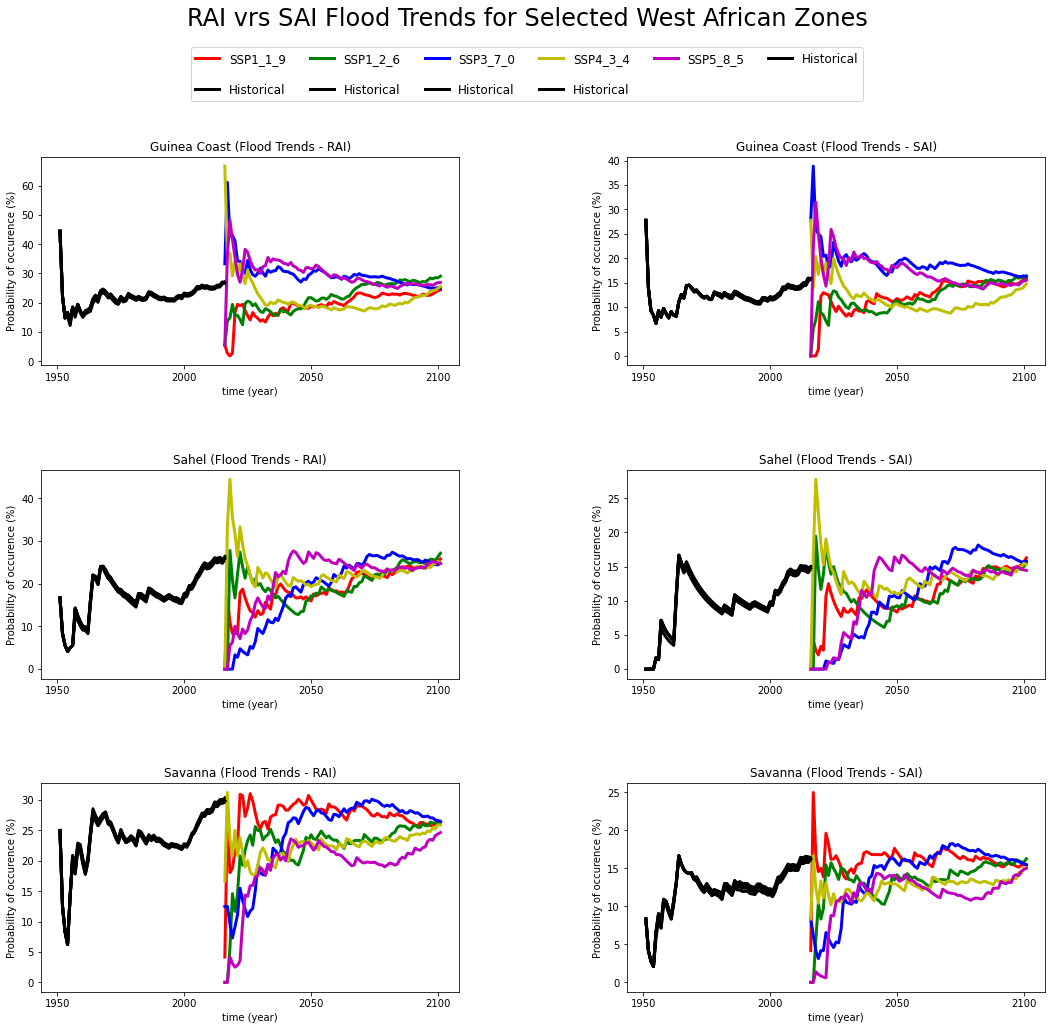

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()

###### Empty Ordered Dictionaries to store output values ##########

### RAI Values for Guinea Coast(GC), Sahel(SAH) and Savanna(SAV) zones of West Africa ###
GC_fld_RAI_output = OrderedDict()
GC_fld_RAI_output1 = OrderedDict()
SAH_fld_RAI_output = OrderedDict()
SAH_fld_RAI_output1 = OrderedDict()
SAV_fld_RAI_output = OrderedDict()
SAV_fld_RAI_output1 = OrderedDict()

### SAI Values for Guinea Coast(GC), Sahel(SAH) and Savanna(SAV) zones of West Africa ###
GC_fld_SAI_output = OrderedDict()
GC_fld_SAI_output1 = OrderedDict()
SAH_fld_SAI_output = OrderedDict()
SAH_fld_SAI_output1 = OrderedDict()
SAV_fld_SAI_output = OrderedDict()
SAV_fld_SAI_output1 = OrderedDict()

for j,scenario in enumerate(scenarios):
        GC_fld_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        GC_fld_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAH_fld_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAH_fld_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAV_fld_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAV_fld_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        
        GC_fld_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        GC_fld_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAH_fld_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAH_fld_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAV_fld_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAV_fld_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        
        for k in range(len(mod_scenarios.get(scenario))):
            #try:
            GC_fld_RAI_output[scenario] = GC_fld_RAI[scenario].values
            GC_fld_RAI_output1[scenario] = GC_fld_RAI1[scenario].values
            SAH_fld_RAI_output[scenario] = SAH_fld_RAI[scenario].values
            SAH_fld_RAI_output1[scenario] = SAH_fld_RAI1[scenario].values
            SAV_fld_RAI_output[scenario] = SAV_fld_RAI[scenario].values
            SAV_fld_RAI_output1[scenario] = SAV_fld_RAI1[scenario].values
            
            GC_fld_SAI_output[scenario] = GC_fld_SAI[scenario].values
            GC_fld_SAI_output1[scenario] = GC_fld_SAI1[scenario].values
            SAH_fld_SAI_output[scenario] = SAH_fld_SAI[scenario].values
            SAH_fld_SAI_output1[scenario] = SAH_fld_SAI1[scenario].values
            SAV_fld_SAI_output[scenario] = SAV_fld_SAI[scenario].values
            SAV_fld_SAI_output1[scenario] = SAV_fld_SAI1[scenario].values
            
        ax[0].plot(da_RR[scenario].time, GC_fld_RAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[0].plot(da_RR1[scenario].time, GC_fld_RAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[0].set(title='Guinea Coast (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[1].plot(da_RR[scenario].time, GC_fld_SAI_output[scenario], color=colors[j], linewidth=3)#, label =scenario)
        ax[1].plot(da_RR1[scenario].time, GC_fld_SAI_output1[scenario], color='k', linewidth=3)#, label = 'Historical')
        ax[1].set(title='Guinea Coast (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[2].plot(da_RR[scenario].time, SAH_fld_RAI_output[scenario], color=colors[j], linewidth=3)#, label =scenario)
        ax[2].plot(da_RR1[scenario].time, SAH_fld_RAI_output1[scenario], color='k', linewidth=3)
        ax[2].set(title='Sahel (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[3].plot(da_RR[scenario].time, SAH_fld_SAI_output[scenario], color=colors[j], linewidth=3)#, label =scenario)
        ax[3].plot(da_RR1[scenario].time, SAH_fld_SAI_output1[scenario], color='k', linewidth=3)
        ax[3].set(title='Sahel (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[4].plot(da_RR[scenario].time, SAV_fld_RAI_output[scenario], color=colors[j], linewidth=3)#, label =scenario)
        ax[4].plot(da_RR1[scenario].time, SAV_fld_RAI_output1[scenario], color='k', linewidth=3)
        ax[4].set(title='Savanna (Flood Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[5].plot(da_RR[scenario].time, SAV_fld_SAI_output[scenario], color=colors[j], linewidth=3)#, label =scenario)
        ax[5].plot(da_RR1[scenario].time, SAV_fld_SAI_output1[scenario], color='k', linewidth=3)
        ax[5].set(title='Savanna (Flood Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

handles, labels = ax[0].get_legend_handles_labels()
fig.suptitle('RAI vrs SAI Flood Trends for Selected West African Zones', fontsize=24)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'rai vrs sai_fl-trends')
plt.show()

### Comparison of RAI and SAI Drought Projections (trends) ###

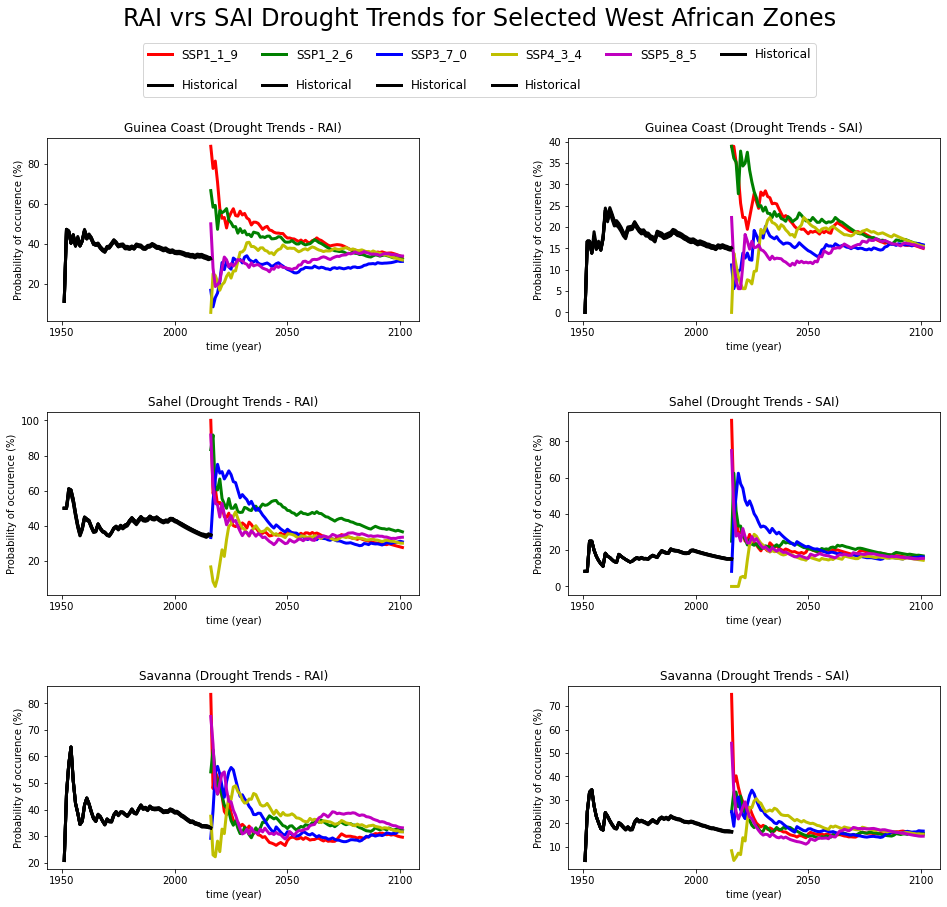

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,14))
fig.subplots_adjust(wspace=0.4, hspace=0.5, top=0.85)
ax = axes.flatten()

###### Empty Ordered Dictionaries to store output values ##########

### RAI Values for Guinea Coast(GC), Sahel(SAH) and Savanna(SAV) zones of West Africa ###
GC_dght_RAI_output = OrderedDict()
GC_dght_RAI_output1 = OrderedDict()
SAH_dght_RAI_output = OrderedDict()
SAH_dght_RAI_output1 = OrderedDict()
SAV_dght_RAI_output = OrderedDict()
SAV_dght_RAI_output1 = OrderedDict()

### SAI Values for Guinea Coast(GC), Sahel(SAH) and Savanna(SAV) zones of West Africa ###
GC_dght_SAI_output = OrderedDict()
GC_dght_SAI_output1 = OrderedDict()
SAH_dght_SAI_output = OrderedDict()
SAH_dght_SAI_output1 = OrderedDict()
SAV_dght_SAI_output = OrderedDict()
SAV_dght_SAI_output1 = OrderedDict()

colors = ['r','g','b','y','m']

for j,scenario in enumerate(scenarios):
        GC_dght_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        GC_dght_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAH_dght_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAH_dght_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAV_dght_RAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAV_dght_RAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        
        GC_dght_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        GC_dght_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAH_dght_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAH_dght_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        SAV_dght_SAI_output[scenario] = np.ones([len(mod_scenarios.get(scenario)),86])*np.nan
        SAV_dght_SAI_output1[scenario] = np.ones([len(mod_scenarios.get(scenario)),66])*np.nan
        
        for k in range(len(mod_scenarios.get(scenario))):
            #try:
            GC_dght_RAI_output[scenario] = GC_dght_RAI[scenario].values
            GC_dght_RAI_output1[scenario] = GC_dght_RAI1[scenario].values
            SAH_dght_RAI_output[scenario] = SAH_dght_RAI[scenario].values
            SAH_dght_RAI_output1[scenario] = SAH_dght_RAI1[scenario].values
            SAV_dght_RAI_output[scenario] = SAV_dght_RAI[scenario].values
            SAV_dght_RAI_output1[scenario] = SAV_dght_RAI1[scenario].values
            
            GC_dght_SAI_output[scenario] = GC_dght_SAI[scenario].values
            GC_dght_SAI_output1[scenario] = GC_dght_SAI1[scenario].values
            SAH_dght_SAI_output[scenario] = SAH_dght_SAI[scenario].values
            SAH_dght_SAI_output1[scenario] = SAH_dght_SAI1[scenario].values
            SAV_dght_SAI_output[scenario] = SAV_dght_SAI[scenario].values
            SAV_dght_SAI_output1[scenario] = SAV_dght_SAI1[scenario].values
            
        ax[0].plot(da_RR[scenario].time, GC_dght_RAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[0].plot(da_RR1[scenario].time, GC_dght_RAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[0].set(title='Guinea Coast (Drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[1].plot(da_RR[scenario].time, GC_dght_SAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[1].plot(da_RR1[scenario].time, GC_dght_SAI_output1[scenario], color='k', linewidth=3, label = 'Historical')
        ax[1].set(title='Guinea Coast (Drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[2].plot(da_RR[scenario].time, SAH_dght_RAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[2].plot(da_RR1[scenario].time, SAH_dght_RAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[2].set(title='Sahel (Drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[3].plot(da_RR[scenario].time, SAH_dght_SAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[3].plot(da_RR1[scenario].time, SAH_dght_SAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[3].set(title='Sahel (Drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[4].plot(da_RR[scenario].time, SAV_dght_RAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[4].plot(da_RR1[scenario].time, SAV_dght_RAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[4].set(title='Savanna (Drought Trends - RAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

        ax[5].plot(da_RR[scenario].time, SAV_dght_SAI_output[scenario], color=colors[j], linewidth=3, label =scenario)
        ax[5].plot(da_RR1[scenario].time, SAV_dght_SAI_output1[scenario], color='k', linewidth=3, label ='Historical')
        ax[5].set(title='Savanna (Drought Trends - SAI)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
        
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize='large', ncol=6, labelspacing=1.5)
fig.suptitle('RAI vrs SAI Drought Trends for Selected West African Zones', fontsize=24)
save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'rai vrs sai_dght-trends')
plt.show()

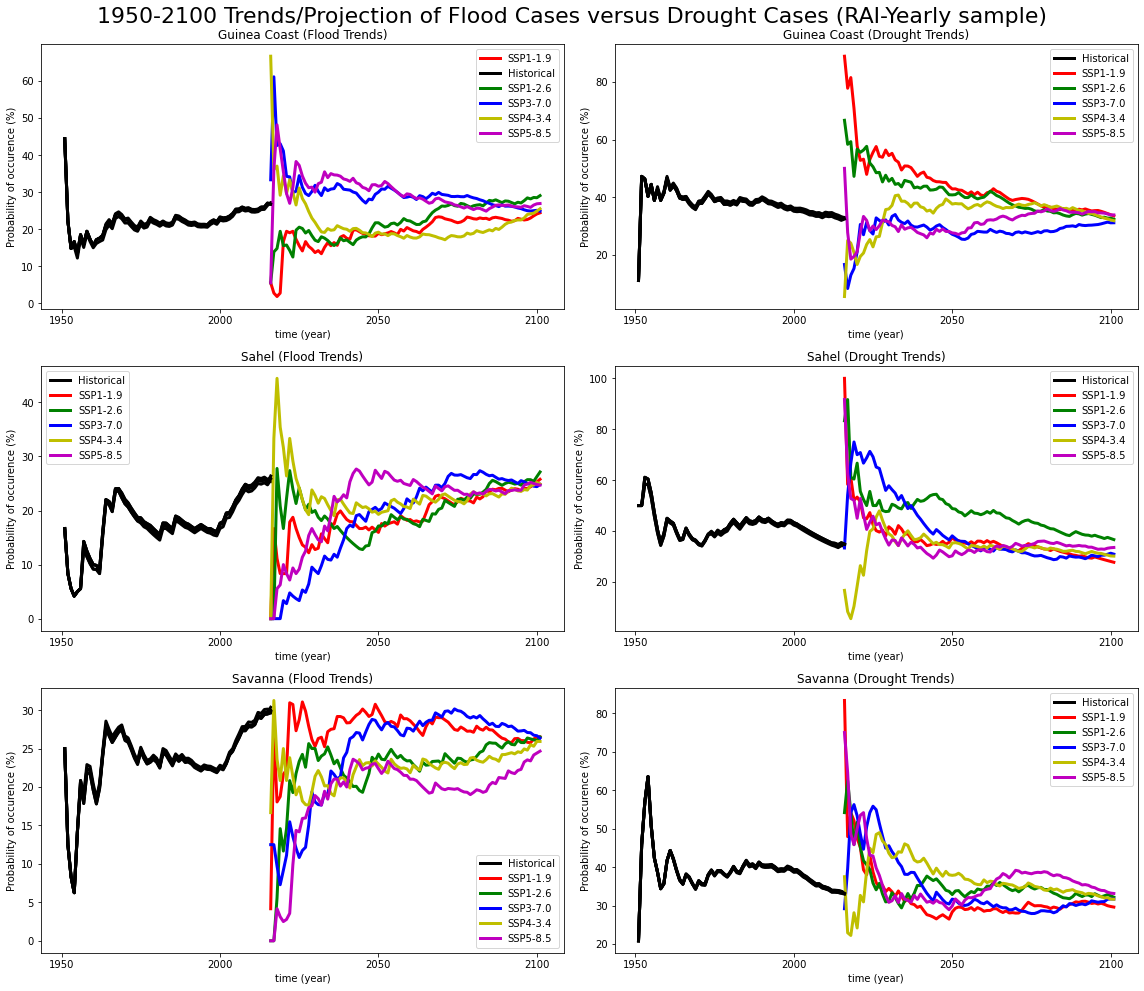

In [7]:
SSP1_1_9_GC_fld_output=np.ones([len(ssp119_mMod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(ssp119_mMod),86])*np.nan
SSP1_1_9_SAV_fld_output = np.ones([len(ssp119_mMod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(ssp119_mMod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(ssp119_mMod),86])*np.nan
SSP1_1_9_SAV_dght_output = np.ones([len(ssp119_mMod),86])*np.nan

SSP1_1_9_GC_fld_output1=np.ones([len(ssp119_mMod),66])*np.nan
SSP1_1_9_SAH_fld_output1 = np.ones([len(ssp119_mMod),66])*np.nan
SSP1_1_9_SAV_fld_output1 = np.ones([len(ssp119_mMod),66])*np.nan

SSP1_1_9_GC_dght_output1 = np.ones([len(ssp119_mMod),66])*np.nan
SSP1_1_9_SAH_dght_output1 = np.ones([len(ssp119_mMod),66])*np.nan
SSP1_1_9_SAV_dght_output1 = np.ones([len(ssp119_mMod),66])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAV_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAV_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_fld_output1=np.ones([len(SSP1_2_6_mod),66])*np.nan
SSP1_2_6_SAH_fld_output1 = np.ones([len(SSP1_2_6_mod),66])*np.nan
SSP1_2_6_SAV_fld_output1 = np.ones([len(SSP1_2_6_mod),66])*np.nan

SSP1_2_6_GC_dght_output1 = np.ones([len(SSP1_2_6_mod),66])*np.nan
SSP1_2_6_SAH_dght_output1 = np.ones([len(SSP1_2_6_mod),66])*np.nan
SSP1_2_6_SAV_dght_output1 = np.ones([len(SSP1_2_6_mod),66])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAV_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAV_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_fld_output1=np.ones([len(SSP3_7_0_mod),66])*np.nan
SSP3_7_0_SAH_fld_output1 = np.ones([len(SSP3_7_0_mod),66])*np.nan
SSP3_7_0_SAV_fld_output1 = np.ones([len(SSP3_7_0_mod),66])*np.nan

SSP3_7_0_GC_dght_output1 = np.ones([len(SSP3_7_0_mod),66])*np.nan
SSP3_7_0_SAH_dght_output1 = np.ones([len(SSP3_7_0_mod),66])*np.nan
SSP3_7_0_SAV_dght_output1 = np.ones([len(SSP3_7_0_mod),66])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAV_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAV_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_fld_output1=np.ones([len(SSP4_3_4_mod),66])*np.nan
SSP4_3_4_SAH_fld_output1 = np.ones([len(SSP4_3_4_mod),66])*np.nan
SSP4_3_4_SAV_fld_output1 = np.ones([len(SSP4_3_4_mod),66])*np.nan

SSP4_3_4_GC_dght_output1 = np.ones([len(SSP4_3_4_mod),66])*np.nan
SSP4_3_4_SAH_dght_output1 = np.ones([len(SSP4_3_4_mod),66])*np.nan
SSP4_3_4_SAV_dght_output1 = np.ones([len(SSP4_3_4_mod),66])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAV_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAV_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_fld_output1=np.ones([len(SSP5_8_5_mod),66])*np.nan
SSP5_8_5_SAH_fld_output1 = np.ones([len(SSP5_8_5_mod),66])*np.nan
SSP5_8_5_SAV_fld_output1 = np.ones([len(SSP5_8_5_mod),66])*np.nan

SSP5_8_5_GC_dght_output1 = np.ones([len(SSP5_8_5_mod),66])*np.nan
SSP5_8_5_SAH_dght_output1 = np.ones([len(SSP5_8_5_mod),66])*np.nan
SSP5_8_5_SAV_dght_output1 = np.ones([len(SSP5_8_5_mod),66])*np.nan


for i in range(len(ssp119_mMod)):
    try:
        SSP1_1_9_GC_fld_output[i] = GC_fld_RAI['SSP1_1_9'].values
        SSP1_1_9_SAH_fld_output[i] = SAH_fld_RAI['SSP1_1_9'].values
        SSP1_1_9_SAV_fld_output[i] = SAV_fld_RAI['SSP1_1_9'].values
        SSP1_1_9_GC_dght_output[i] = GC_dght_RAI['SSP1_1_9'].values
        SSP1_1_9_SAH_dght_output[i] = SAH_dght_RAI['SSP1_1_9'].values
        SSP1_1_9_SAV_dght_output[i] = SAV_dght_RAI['SSP1_1_9'].values
        
        SSP1_1_9_GC_fld_output1[i] = GC_fld_RAI1['SSP1_1_9'].values
        SSP1_1_9_SAH_fld_output1[i] = SAH_fld_RAI1['SSP1_1_9'].values
        SSP1_1_9_SAV_fld_output1[i] = SAV_fld_RAI1['SSP1_1_9'].values
        SSP1_1_9_GC_dght_output1[i] = GC_dght_RAI1['SSP1_1_9'].values
        SSP1_1_9_SAH_dght_output1[i] = SAH_dght_RAI1['SSP1_1_9'].values
        SSP1_1_9_SAV_dght_output1[i] = SAV_dght_RAI1['SSP1_1_9'].values
    except:
        pass

for i in range(len(SSP1_2_6_mod)):
    try:
        SSP1_2_6_GC_fld_output[i] = GC_fld_RAI['SSP1_2_6'].values
        SSP1_2_6_SAH_fld_output[i] = SAH_fld_RAI['SSP1_2_6'].values
        SSP1_2_6_SAV_fld_output[i] = SAV_fld_RAI['SSP1_2_6'].values
        SSP1_2_6_GC_dght_output[i] = GC_dght_RAI['SSP1_2_6'].values
        SSP1_2_6_SAH_dght_output[i] = SAH_dght_RAI['SSP1_2_6'].values
        SSP1_2_6_SAV_dght_output[i] = SAV_dght_RAI['SSP1_2_6'].values
        
        SSP1_2_6_GC_fld_output1[i] = GC_fld_RAI1['SSP1_2_6'].values
        SSP1_2_6_SAH_fld_output1[i] = SAH_fld_RAI1['SSP1_2_6'].values
        SSP1_2_6_SAV_fld_output1[i] = SAV_fld_RAI1['SSP1_2_6'].values
        SSP1_2_6_GC_dght_output1[i] = GC_dght_RAI1['SSP1_2_6'].values
        SSP1_2_6_SAH_dght_output1[i] = SAH_dght_RAI1['SSP1_2_6'].values
        SSP1_2_6_SAV_dght_output1[i] = SAV_dght_RAI1['SSP1_2_6'].values
    except:
        pass

for i in range(len(SSP3_7_0_mod)):
    
    try:
        SSP3_7_0_GC_fld_output[i] = GC_fld_RAI['SSP3_7_0'].values
        SSP3_7_0_SAH_fld_output[i] = SAH_fld_RAI['SSP3_7_0'].values
        SSP3_7_0_SAV_fld_output[i] = SAV_fld_RAI['SSP3_7_0'].values
        SSP3_7_0_GC_dght_output[i] = GC_dght_RAI['SSP3_7_0'].values
        SSP3_7_0_SAH_dght_output[i] = SAH_dght_RAI['SSP3_7_0'].values
        SSP3_7_0_SAV_dght_output[i] = SAV_dght_RAI['SSP3_7_0'].values
        
        SSP3_7_0_GC_fld_output1[i] = GC_fld_RAI1['SSP3_7_0'].values
        SSP3_7_0_SAH_fld_output1[i] = SAH_fld_RAI1['SSP3_7_0'].values
        SSP3_7_0_SAV_fld_output1[i] = SAV_fld_RAI1['SSP3_7_0'].values
        SSP3_7_0_GC_dght_output1[i] = GC_dght_RAI1['SSP3_7_0'].values
        SSP3_7_0_SAH_dght_output1[i] = SAH_dght_RAI1['SSP3_7_0'].values
        SSP3_7_0_SAV_dght_output1[i] = SAV_dght_RAI1['SSP3_7_0'].values
    except:
        pass

for i in range(len(SSP4_3_4_mod)):
  
    try:
        SSP4_3_4_GC_fld_output[i] = GC_fld_RAI['SSP4_3_4'].values
        SSP4_3_4_SAH_fld_output[i] = SAH_fld_RAI['SSP4_3_4'].values
        SSP4_3_4_SAV_fld_output[i] = SAV_fld_RAI['SSP4_3_4'].values
        SSP4_3_4_GC_dght_output[i] = GC_dght_RAI['SSP4_3_4'].values
        SSP4_3_4_SAH_dght_output[i] = SAH_dght_RAI['SSP4_3_4'].values
        SSP4_3_4_SAV_dght_output[i] = SAV_dght_RAI['SSP4_3_4'].values
        
        SSP4_3_4_GC_fld_output1[i] = GC_fld_RAI1['SSP4_3_4'].values
        SSP4_3_4_SAH_fld_output1[i] = SAH_fld_RAI1['SSP4_3_4'].values
        SSP4_3_4_SAV_fld_output1[i] = SAV_fld_RAI1['SSP4_3_4'].values
        SSP4_3_4_GC_dght_output1[i] = GC_dght_RAI1['SSP4_3_4'].values
        SSP4_3_4_SAH_dght_output1[i] = SAH_dght_RAI1['SSP4_3_4'].values
        SSP4_3_4_SAV_dght_output1[i] = SAV_dght_RAI1['SSP4_3_4'].values
    except:
        pass

        
for i in range(len(SSP5_8_5_mod)):
    
    try:
        SSP5_8_5_GC_fld_output[i] = GC_fld_RAI['SSP5_8_5'].values
        SSP5_8_5_SAH_fld_output[i] = SAH_fld_RAI['SSP5_8_5'].values
        SSP5_8_5_SAV_fld_output[i] = SAV_fld_RAI['SSP5_8_5'].values
        SSP5_8_5_GC_dght_output[i] = GC_dght_RAI['SSP5_8_5'].values
        SSP5_8_5_SAH_dght_output[i] = SAH_dght_RAI['SSP5_8_5'].values
        SSP5_8_5_SAV_dght_output[i] = SAV_dght_RAI['SSP5_8_5'].values
        
        SSP5_8_5_GC_fld_output1[i] = GC_fld_RAI1['SSP5_8_5'].values
        SSP5_8_5_SAH_fld_output1[i] = SAH_fld_RAI1['SSP5_8_5'].values
        SSP5_8_5_SAV_fld_output1[i] = SAV_fld_RAI1['SSP5_8_5'].values
        SSP5_8_5_GC_dght_output1[i] = GC_dght_RAI1['SSP5_8_5'].values
        SSP5_8_5_SAH_dght_output1[i] = SAH_dght_RAI1['SSP5_8_5'].values
        SSP5_8_5_SAV_dght_output1[i] = SAV_dght_RAI1['SSP5_8_5'].values
    except:
        pass


fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_GC_fld_output1.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_GC_fld_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP1-2.6')
axes[0,0].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_GC_fld_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP3-7.0')
axes[0,0].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_GC_fld_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP4-3.4')
axes[0,0].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,0].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_GC_fld_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP5-8.5')

axes[0,0].legend()
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_SAH_fld_output1.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_SAH_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP1-2.6')
axes[1,0].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_SAH_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP3-7.0')
axes[1,0].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_SAH_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP4-3.4')
axes[1,0].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_SAH_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP5-8.5')
axes[1,0].legend(loc='upper left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_SAV_fld_output1.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[2,0].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_SAV_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_SAV_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_SAV_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP1-2.6')
axes[2,0].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_SAV_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_SAV_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP3-7.0')
axes[2,0].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_SAV_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_SAV_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP4-3.4')
axes[2,0].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_SAV_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_SAV_fld_output1.mean(axis=0), color='k', linewidth=3)#, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


#Drought Plots
axes[0,1].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_GC_dght_output1.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,1].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_GC_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP1-2.6')
axes[0,1].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_GC_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP3-7.0')
axes[0,1].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_GC_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP4-3.4')
axes[0,1].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_GC_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP5-8.5')
axes[0,1].legend()
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_SAH_dght_output1.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[1,1].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_SAH_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP1-2.6')
axes[1,1].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_SAH_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP3-7.0')
axes[1,1].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_SAH_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP4-3.4')
axes[1,1].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_SAH_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1['SSP1_1_9'].time, SSP1_1_9_SAV_dght_output1.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[2,1].plot(da_RR['SSP1_1_9'].time, SSP1_1_9_SAV_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR['SSP1_2_6'].time, SSP1_2_6_SAV_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR1['SSP1_2_6'].time, SSP1_2_6_SAV_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP1-2.6')
axes[2,1].plot(da_RR['SSP3_7_0'].time, SSP3_7_0_SAV_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR1['SSP3_7_0'].time, SSP3_7_0_SAV_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP3-7.0')
axes[2,1].plot(da_RR['SSP4_3_4'].time, SSP4_3_4_SAV_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR1['SSP4_3_4'].time, SSP4_3_4_SAV_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP4-3.4')
axes[2,1].plot(da_RR['SSP5_8_5'].time, SSP5_8_5_SAV_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].plot(da_RR1['SSP5_8_5'].time, SSP5_8_5_SAV_dght_output1.mean(axis=0), color='k', linewidth=3)#, label ='SSP5-8.5')
axes[2,1].legend(loc='upper right')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (RAI-Yearly sample)', fontsize=22)

fig.tight_layout()
save_plot(glob(os.path.join(path,'merged_cmip6_data/plots/'))[0],'fld_trends-rai')
plt.show()

SPEI. The principle of SPEI is using the degree of the difference between precipitation and evapotranspiration which deviates the average status to represent the regional drought. e calculation steps are as follows.
Thornthwaite method, one of the most widely used meth-
ods in calculating the potential evapotranspiration (PET),
which takes the monthly mean temperature and monthly
mean sunshine hour as the key factors, was used based on the
following formula:

$$
PET = 16 \times (\frac{N}{12}) \times \frac{m}{30}\times (10\times \frac{T_i}{I})
$$

where $N$ is the monthly mean sunshine hour, $m$ is the number of days in a month,$T_i$ is the monthly mean temperature, $a$ is given as:
$$
a = 6.75 \times 10^-7 \times I^3 - 7.71 \times 10^-5 \times I^2 + 1.79 \times 10^-2 \times I + 0.49,
$$, and $I$ is a cumulative number of 12-month thermal indexes calculated as formula:
$$
I = \sum_{i=1}^{12}(\frac {T_i}{5})^{1.514}
$$
The difference between accumulated monthly precipitation and evapotranspiration was calculated as follows:
$$
D_i = P_i - PET_i,
$$
where $D_i$ is the difference between precipitation and potential evapotranspiration, $P_i$ is the monthly precipitation, and $PET_i$ is the monthly potential evapotranspiration.

The SPEI value can be obtained as:
$$
SPEI = W-\frac{c_0,c_1W+c_2W^2}{1+d_1W+d_2W^2+d_3W^3},
$$
$W = \sqrt{-2 \ln(P)}$ for $P\le 0.5,$ 


In [ ]:
temp_mod = ['temperature_cmip6_download_access_cm2', 'temperature_cmip6_download_access_esm1_5', 'temperature_cmip6_download_awi_esm_1_1_lr', 'temperature_cmip6_download_bcc_csm2_mr', 'temperature_cmip6_download_bcc_esm1', 'temperature_cmip6_download_canesm5', 'temperature_cmip6_download_cesm2', 'temperature_cmip6_download_inm_cm4_8',
           'temperature_cmip6_download_cesm2_fv2', 'temperature_cmip6_download_cesm2_waccm', 'temperature_cmip6_download_cmcc_cm2_hr4', 'temperature_cmip6_download_cmcc_cm2_sr5', 'temperature_cmip6_download_cmcc_esm2', 'temperature_cmip6_download_cnrm_cm6_1',
           'temperature_cmip6_download_cnrm_cm6_1_hr', 'temperature_cmip6_download_cnrm_esm2_1', 'temperature_cmip6_download_fgoals_f3_l', 'temperature_cmip6_download_fgoals_g3', 'temperature_cmip6_download_gfdl_esm4', 'temperature_cmip6_download_hadgem3_gc31_ll', 'temperature_cmip6_download_hadgem3_gc31_mm', 'temperature_cmip6_download_iitm_esm',
           'temperature_cmip6_download_inm_cm5_0', 'temperature_cmip6_download_ipsl_cm5a2_inca', 'temperature_cmip6_download_ipsl_cm6a_lr', 'temperature_cmip6_download_kace_1_0_g', 'temperature_cmip6_download_kiost_esm', 'temperature_cmip6_download_miroc6',
           'temperature_cmip6_download_miroc_es2l', 'temperature_cmip6_download_mpi_esm1_2_hr', 'temperature_cmip6_download_mpi_esm1_2_lr', 'temperature_cmip6_download_mri_esm2_0', 'temperature_cmip6_download_nesm3', 'temperature_cmip6_download_norcpm1',
           'temperature_cmip6_download_noresm2_mm', 'temperature_cmip6_download_taiesm1', 'temperature_cmip6_download_ukesm1_0_ll']
temp_mod = sorted(temp_mod)

temp_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/cmip6_near_surf_temp')
temp_path = os.getcwd()

In [ ]:
for j,mod in enumerate(temp_mod):
    temp_file = glob(os.path.join(temp_path, mod +'/tas*.nc'))[0]
    temp_data = xr.open_dataset(temp_file).tas.sel(time=slice('1991','2020'), lon=slice(-4,2 ), lat=slice(4,12)) - 273.15
    temp_data = temp_data.groupby('time.month').mean('time').mean(['lon','lat'])

In [ ]:
temp_data.mean([])

In [ ]:
def PET(ds):
    I = (ds/5)**1.514
    a = 0.49 + (0.0179 * I) - (0.0000771 * (I)**2) + (0.000000675 * (I)**3)
    
    return 1.6 *(10*ds/I)**a

def pet(ds):
    I = (ds/5)**1.514
    J = I.sum()
    c = 0.49 + (0.0179 * J) - (0.0000771 * (J)**2) + (0.000000675 * (J)**3)
    return 1.6 * (10*ds/J)**c

In [ ]:
PET(temp_data)
pet(temp_data)

In [24]:
for j,scenario in enumerate(scenarios):
    ssp_path = scenarios.get(scenario)
    print(scenario)
    #for k, mod_scenario in enumerate(mod_scenarios.get(scenario)):

SSP1_2_6
SSP3_7_0
SSP5_8_5
